In [ ]:
pip install pycountry


In [ ]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr
import pycountry
# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta


from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The salaries are from ai-jobs. Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

The dataset contains one table structured as follow:

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year with the following possible values:

EN: Entry-level / Junior

MI: Mid-level / Intermediate

SE: Senior-level / Expert

EX: Executive-level / Director

employment_type: The type of employement for the role:

PT: Part-time

FT: Full-time

CT: Contract

FL: Freelance

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely, possible values are as follows:

0: No remote work (less than 20%)

50: Partially remote

100: Fully remote (more than 80%)

company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size: The average number of people that worked for the company during the year:

S: less than 50 employees (small)

M: 50 to 250 employees (medium)

L: more than 250 employees (large)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Files/salaries.csv')

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           18056 non-null  int64 
 1   experience_level    18056 non-null  object
 2   employment_type     18056 non-null  object
 3   job_title           18056 non-null  object
 4   salary              18056 non-null  int64 
 5   salary_currency     18056 non-null  object
 6   salary_in_usd       18056 non-null  int64 
 7   employee_residence  18056 non-null  object
 8   remote_ratio        18056 non-null  int64 
 9   company_location    18056 non-null  object
 10  company_size        18056 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


In [ ]:
df.nunique().sort_values()

,0
remote_ratio,3
company_size,3
experience_level,4
employment_type,4
work_year,5
salary_currency,24
company_location,77
employee_residence,88
job_title,143
salary,2761


In [ ]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,18056.000000,1.805600e+04,18056.000000,18056.000000
mean,2023.292036,1.638751e+05,150856.152913,30.884471
std,0.715810,3.265629e+05,68728.941915,45.828340
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103500.000000,0.000000
50%,2023.000000,1.430000e+05,142200.000000,0.000000
75%,2024.000000,1.900000e+05,188500.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000




*   Unique values in each column.



In [ ]:
for columns in df.columns:
  unique_values = df[columns].unique()
  print(f"Unique values in column '{columns}':")
  print(unique_values)
  print("\n")

Unique values in column 'work_year':
[2024 2022 2023 2020 2021]


Unique values in column 'experience_level':
['MI' 'SE' 'EN' 'EX']


Unique values in column 'employment_type':
['FT' 'CT' 'PT' 'FL']


Unique values in column 'job_title':
['Analytics Engineer' 'AI Developer' 'Data Scientist' 'Research Engineer'
 'Research Scientist' 'Data Engineer' 'Data Analyst' 'Applied Scientist'
 'Machine Learning Engineer' 'Data Architect'
 'Business Intelligence Analyst' 'Research Analyst'
 'Data Analytics Manager' 'Data Product Manager' 'Data Analytics Lead'
 'Business Intelligence Engineer' 'Data Manager'
 'Machine Learning Scientist' 'Prompt Engineer' 'Insight Analyst'
 'BI Analyst' 'AI Engineer' 'Business Intelligence Lead' 'BI Developer'
 'Data Operations Analyst' 'Data Reporting Analyst'
 'Business Intelligence Developer' 'Data Product Owner' 'Data Specialist'
 'Business Intelligence' 'MLOps Engineer' 'Data Visualization Specialist'
 'AI Architect' 'Data Quality Analyst' 'Lead AI Engineer'
 

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')



*   Checking duplicates.



In [ ]:
df.duplicated().sum()

7380

In [ ]:
#Checking duplicates in rows
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
18051,False
18052,False
18053,False
18054,False


In [ ]:
#checking duplicates in all columns
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False])



*   Removing duplicates.



In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10676 entries, 0 to 18055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           10676 non-null  int64 
 1   experience_level    10676 non-null  object
 2   employment_type     10676 non-null  object
 3   job_title           10676 non-null  object
 4   salary              10676 non-null  int64 
 5   salary_currency     10676 non-null  object
 6   salary_in_usd       10676 non-null  int64 
 7   employee_residence  10676 non-null  object
 8   remote_ratio        10676 non-null  int64 
 9   company_location    10676 non-null  object
 10  company_size        10676 non-null  object
dtypes: int64(4), object(7)
memory usage: 1000.9+ KB


In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
18051,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
18052,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
18053,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
18054,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L




*   Checking outliers in all columns.



In [ ]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Outlier condition
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    return outliers

# Detect outliers in each column
outliers = detect_outliers_iqr(df)
for col, outliers_col in outliers.items():
    print(f"Outliers in column '{col}':")
    print(outliers_col)
    print()

Outliers in column 'work_year':
10720    2020
10923    2020
12755    2021
12756    2020
13233    2020
         ... 
18051    2020
18052    2021
18053    2020
18054    2020
18055    2021
Name: work_year, Length: 289, dtype: int64

Outliers in column 'salary':
25        500000
45        440000
46        360000
63        341000
103       364100
          ...   
18031    1335000
18036    1450000
18048     423000
18051     412000
18055    7000000
Name: salary, Length: 234, dtype: int64

Outliers in column 'salary_in_usd':
25       500000
45       440000
46       360000
63       341000
103      364100
          ...  
17786    380000
17838    450000
17983    416000
18048    423000
18051    412000
Name: salary_in_usd, Length: 174, dtype: int64

Outliers in column 'remote_ratio':
Series([], Name: remote_ratio, dtype: int64)



In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,10676.000000,1.067600e+04,10676.000000,10676.000000
mean,2023.279599,1.697783e+05,147553.348820,34.867928
std,0.783339,4.215045e+05,73347.273475,47.046655
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.595700e+04,95000.000000,0.000000
50%,2023.000000,1.400000e+05,139000.000000,0.000000
75%,2024.000000,1.900000e+05,187381.250000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000




*   Value counts of all columns.



In [ ]:
for column in df.columns:
    print(f"Value counts for column {column}:")
    print(df[column].value_counts())
    print()

Value counts for column work_year:
work_year
2024    4746
2023    4533
2022    1108
2021     214
2020      75
Name: count, dtype: int64

Value counts for column experience_level:
experience_level
SE    6199
MI    2972
EN    1102
EX     403
Name: count, dtype: int64

Value counts for column employment_type:
employment_type
FT    10594
PT       38
CT       30
FL       14
Name: count, dtype: int64

Value counts for column job_title:
job_title
Data Scientist                      2322
Data Engineer                       1949
Data Analyst                        1463
Machine Learning Engineer           1120
Research Scientist                   403
                                    ... 
Sales Data Analyst                     1
Data Analytics Associate               1
Applied Research Scientist             1
AI Software Development Engineer       1
BI Data Engineer                       1
Name: count, Length: 143, dtype: int64

Value counts for column salary:
salary
100000    171
150000    15



*   Making a new country column from employee residence.



In [ ]:
country_dict = {country.alpha_2: country.name for country in pycountry.countries}

# Create a new column 'country' by mapping the 'employee_residence' column to country names
df['country'] = df['employee_residence'].map(country_dict)

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S,Canada
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M,United States
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M,United States
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M,United States
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
18051,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,United States
18052,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,United States
18053,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,United States
18054,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,United States


## Univariate Analysis



*   Checking distribution of all numerical columns.



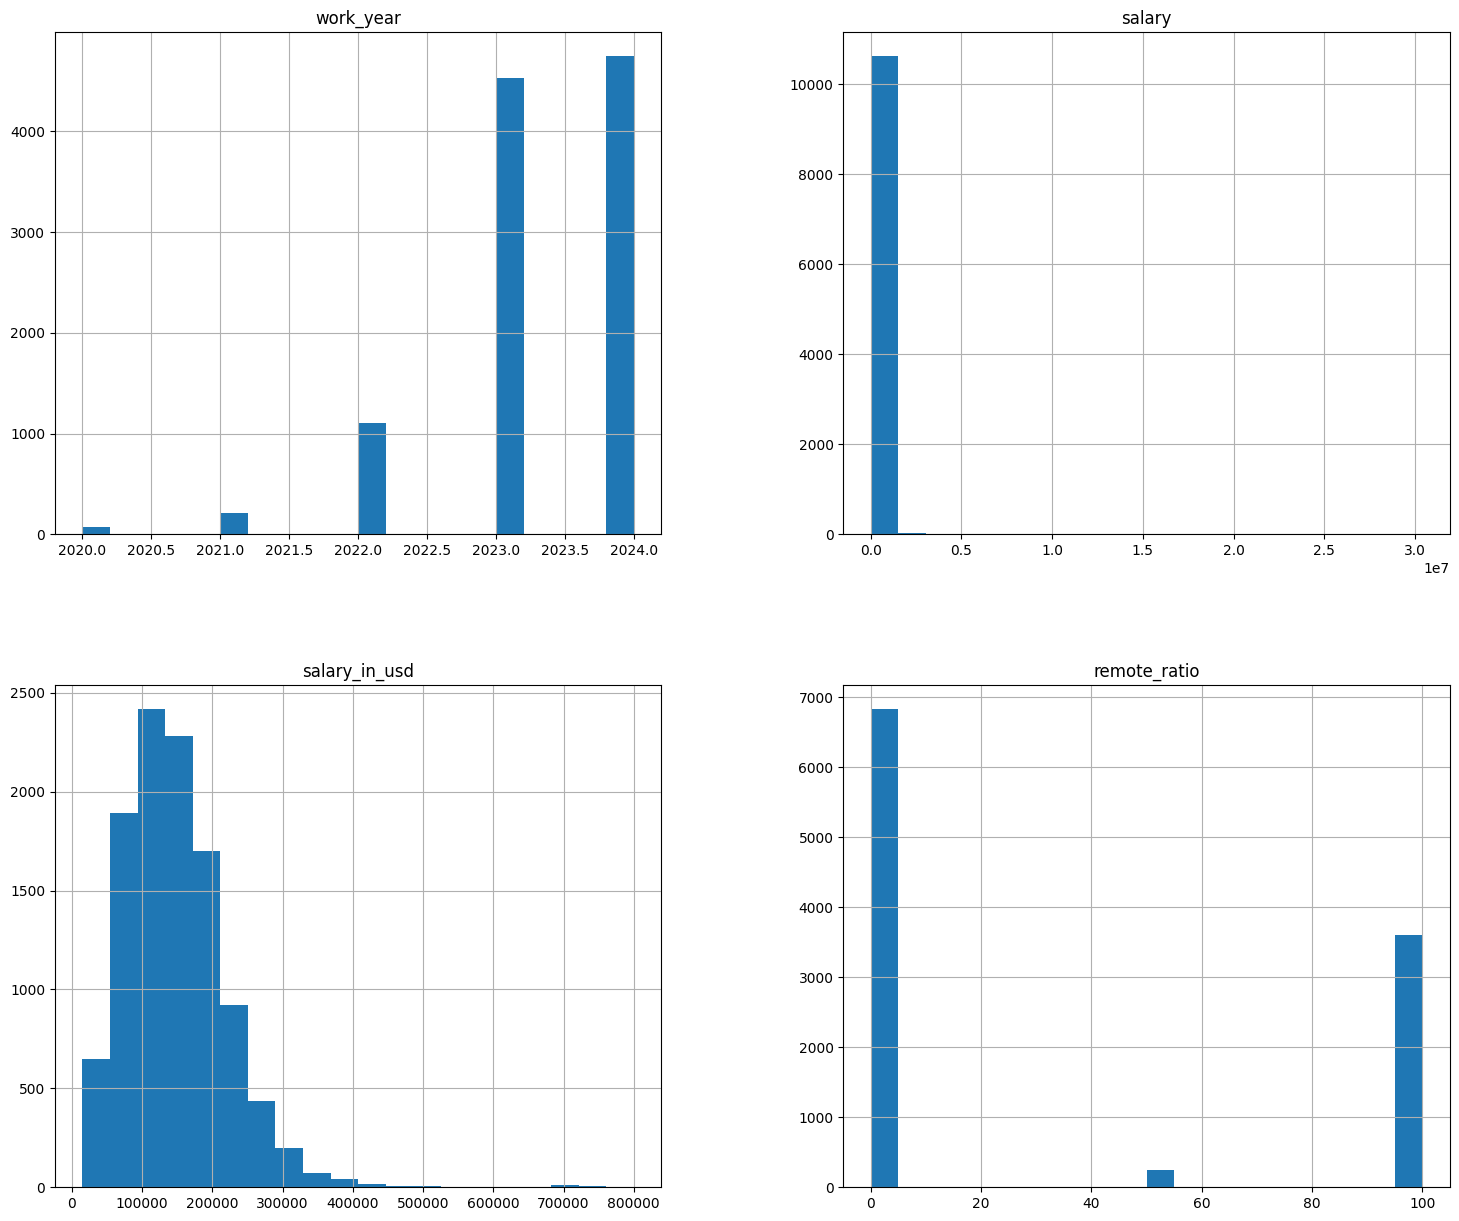

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(18, 15))
plt.show()



*   Checking distribution of all categorical columns.



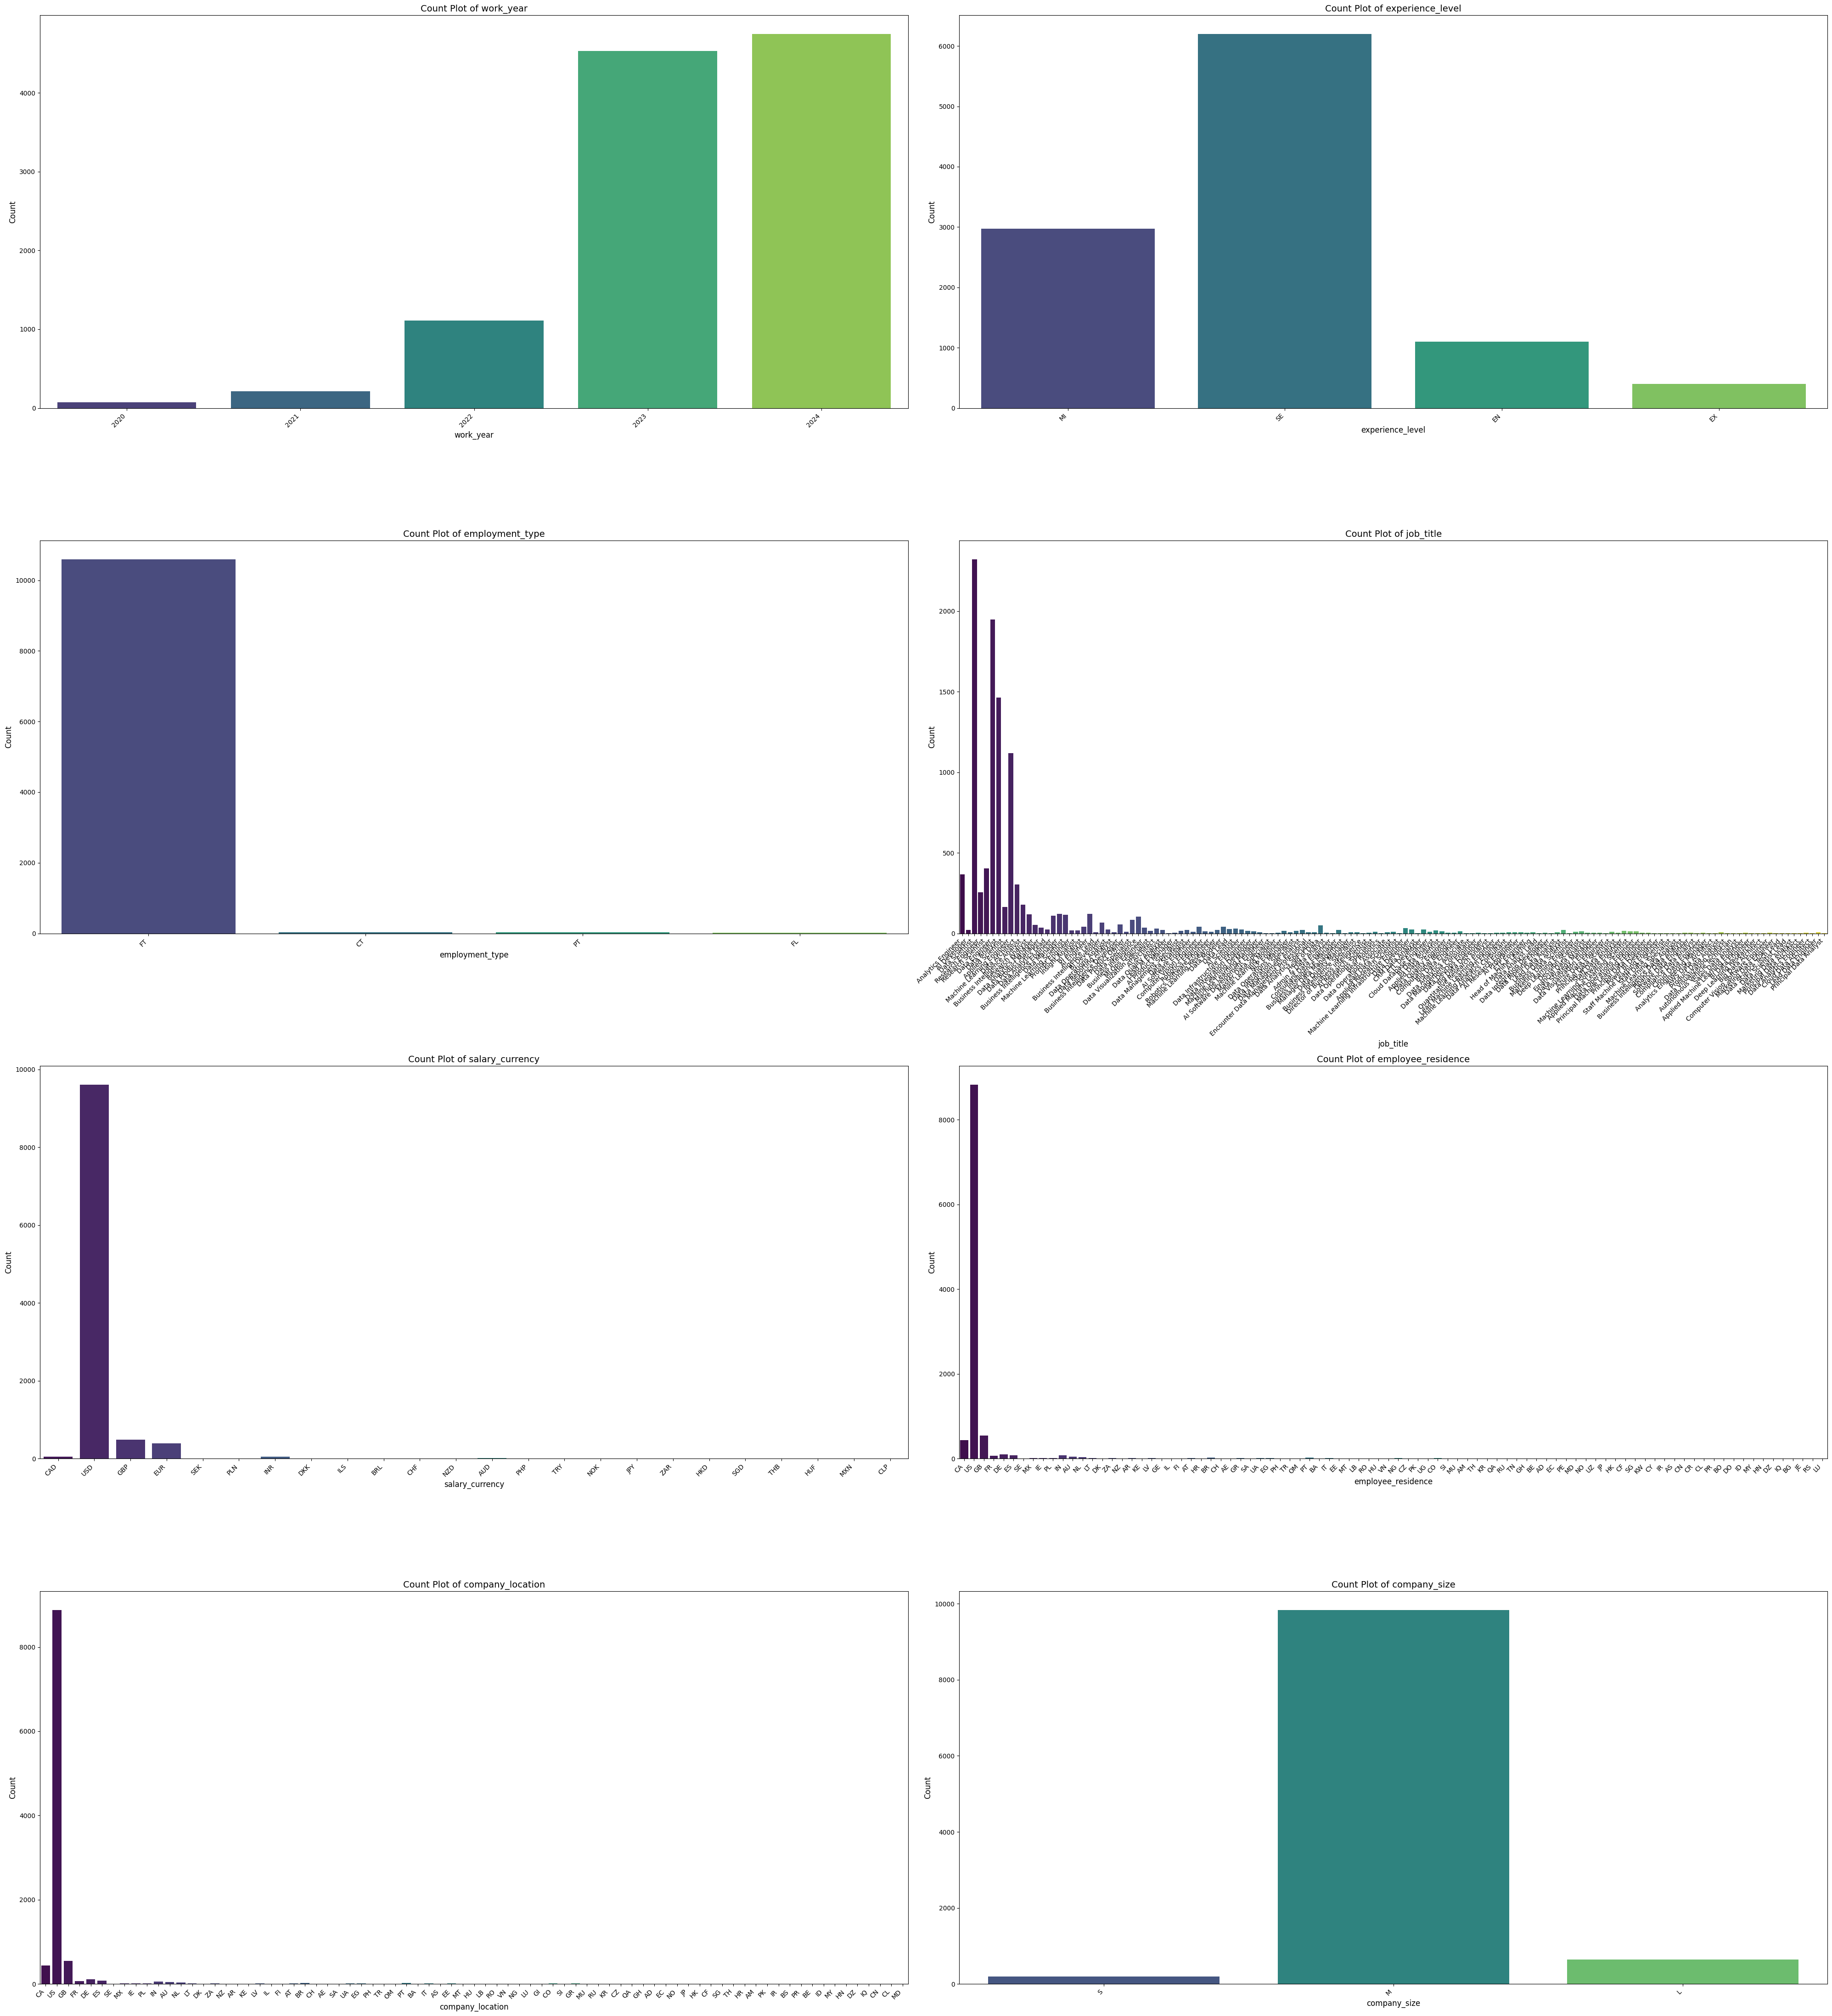

In [ ]:
categorical_features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

# Set the number of rows and columns for subplots
n_cols = 2
n_rows = (len(categorical_features) + 1) // n_cols

# Create the figure
plt.figure(figsize=(40, 44))  # Adjust figure size to accommodate all subplots

# Generate a countplot for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Count Plot of {feature}', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()


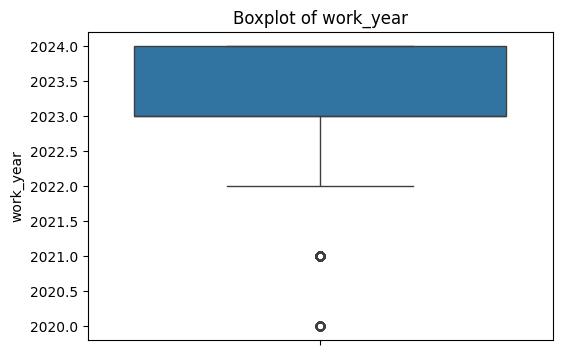

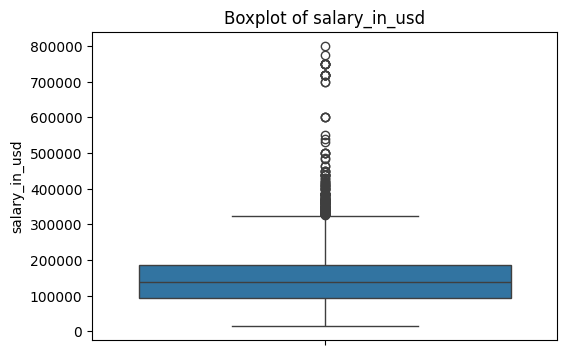

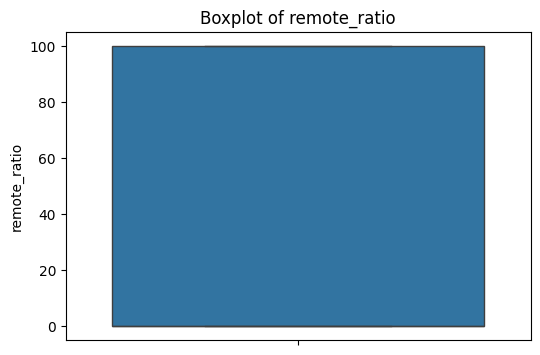

In [ ]:
num = ['work_year', 'salary_in_usd', 'remote_ratio']

for col in num:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Bivariate Analysis

In [ ]:
num_data = ['work_year', 'salary_in_usd', 'remote_ratio']

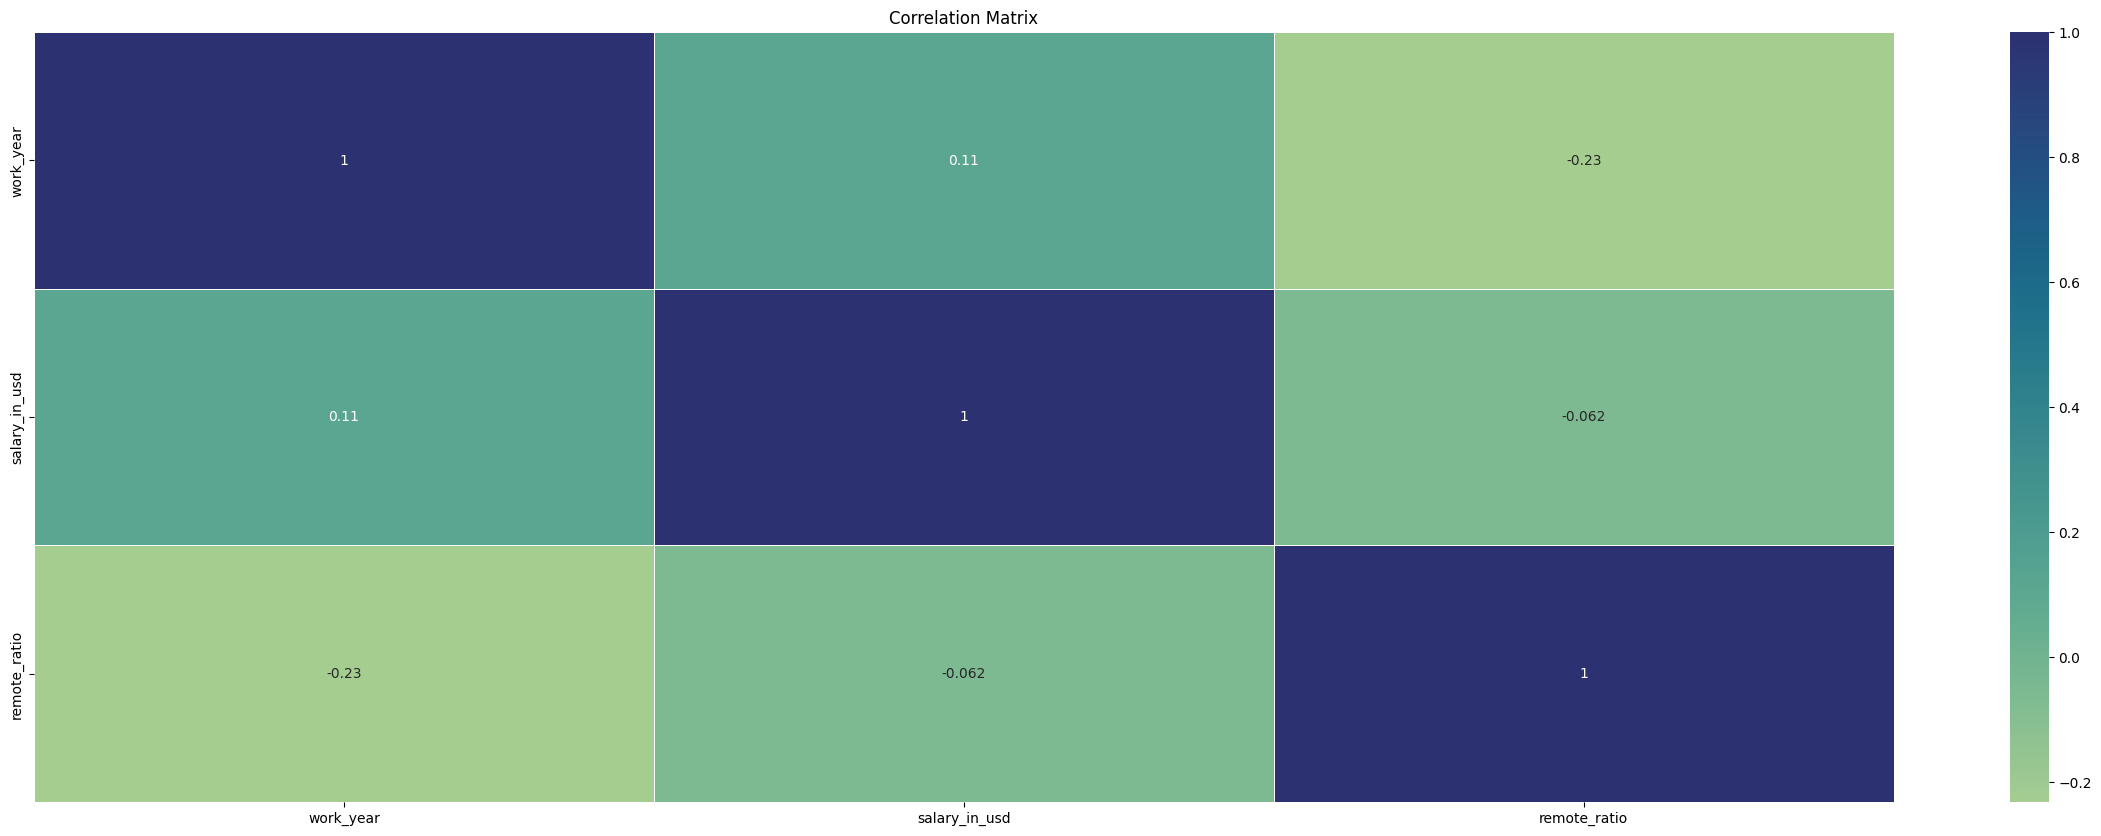

In [ ]:
correlation_matrix = df[num_data].corr()

plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



*   Plotting all columns with salary_in_usd to get insights on how salary is changing with different features.



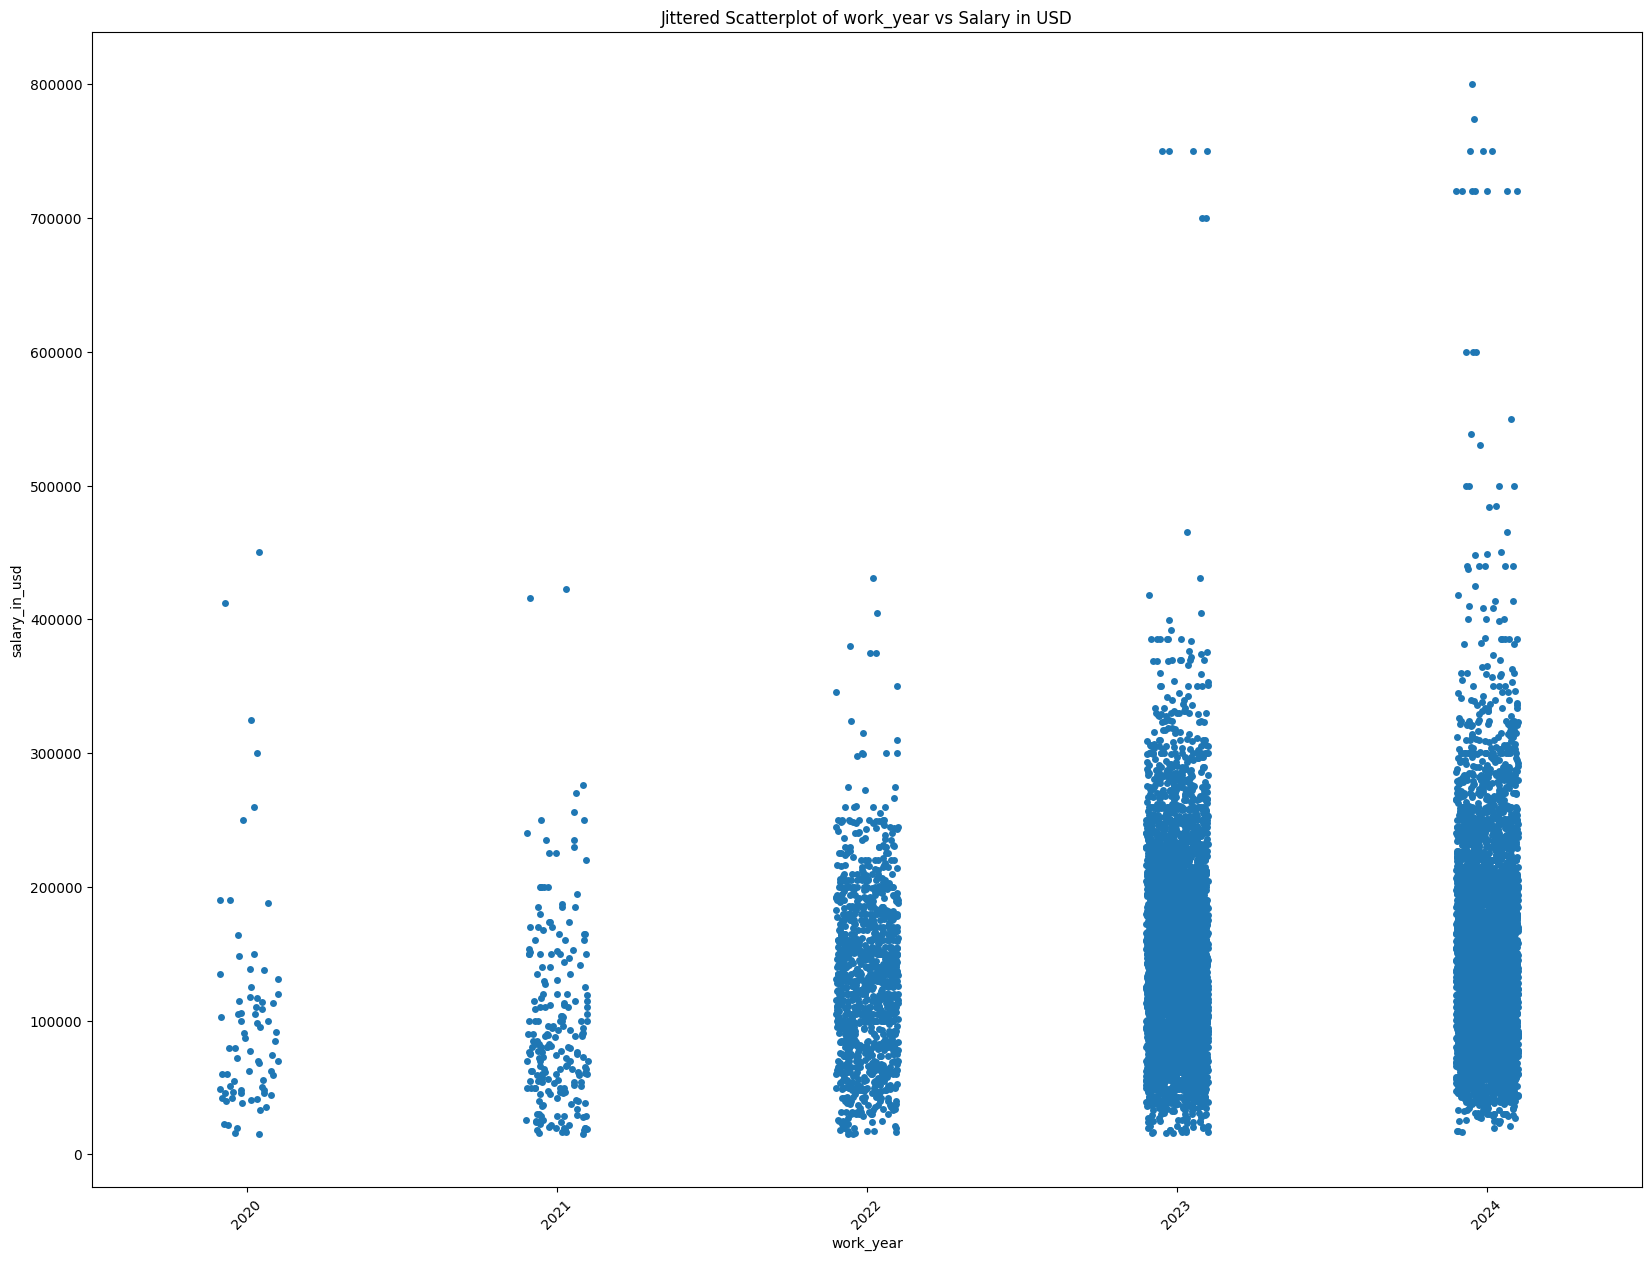

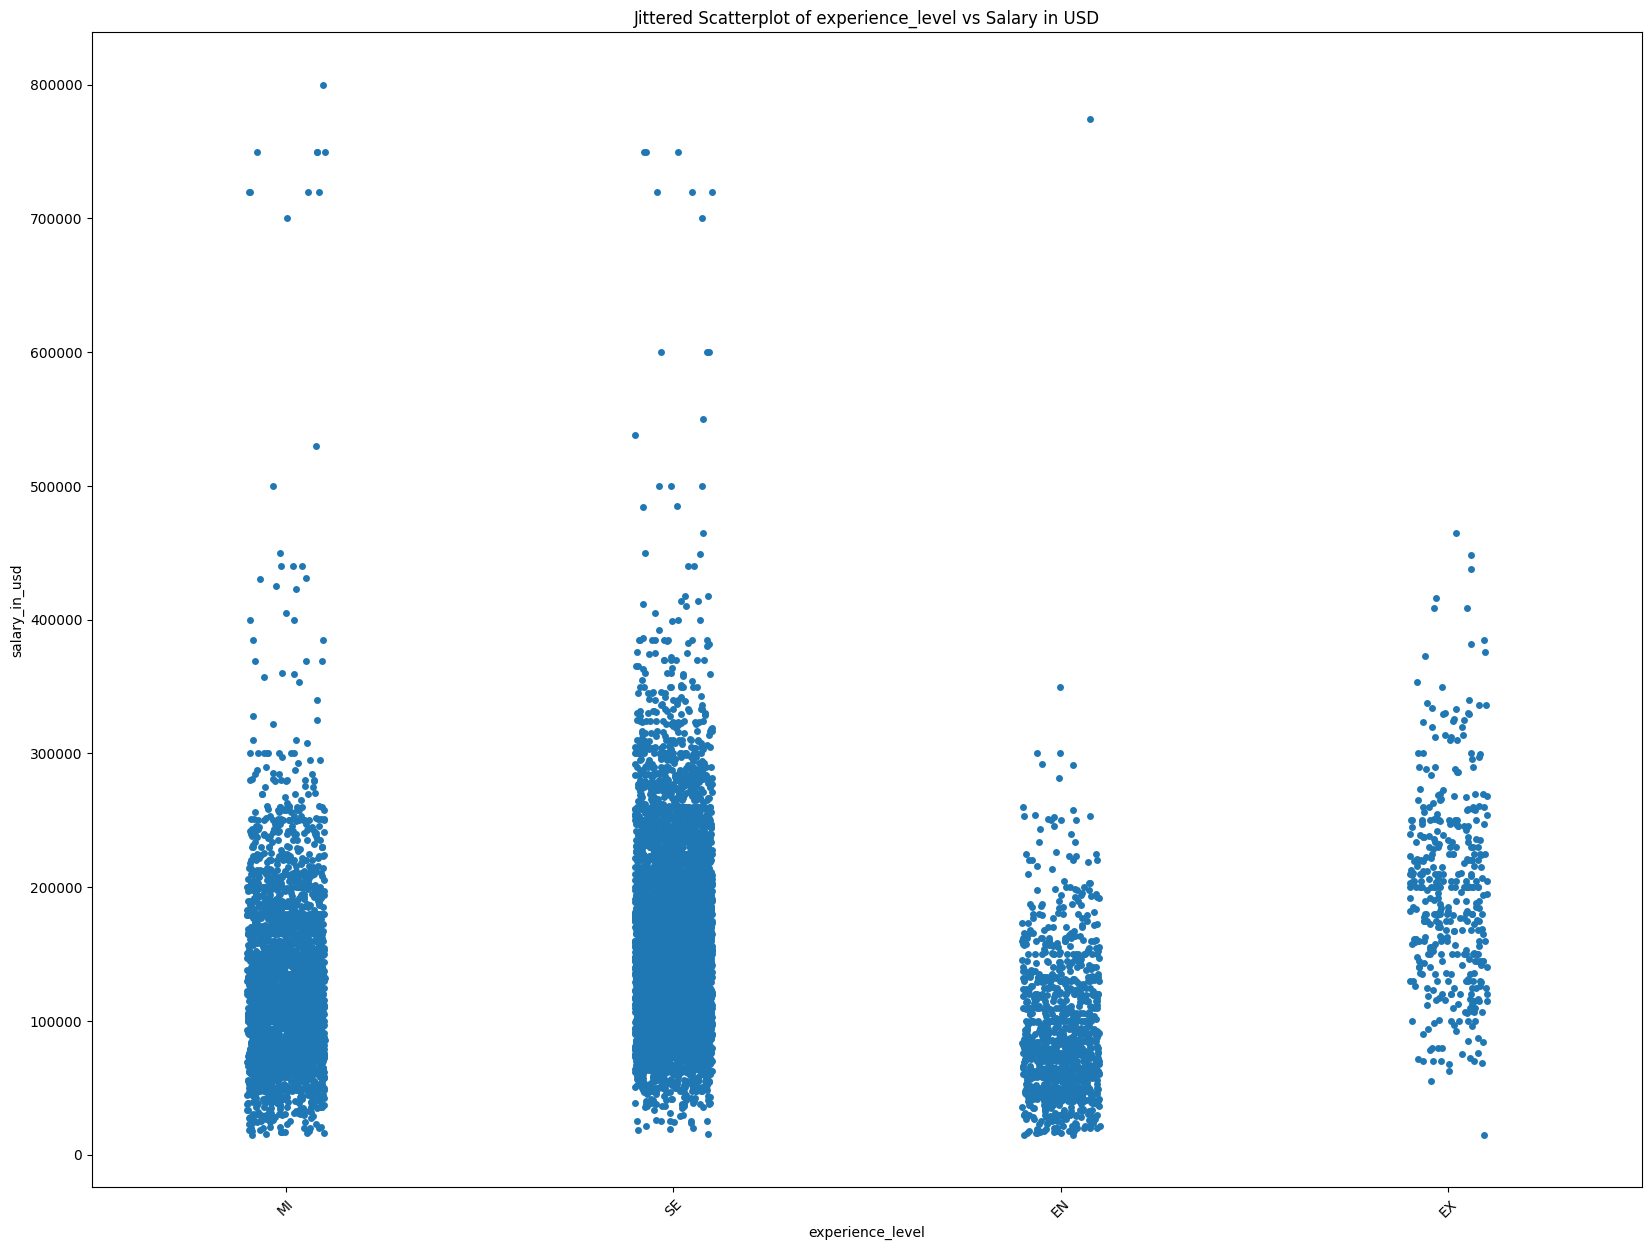

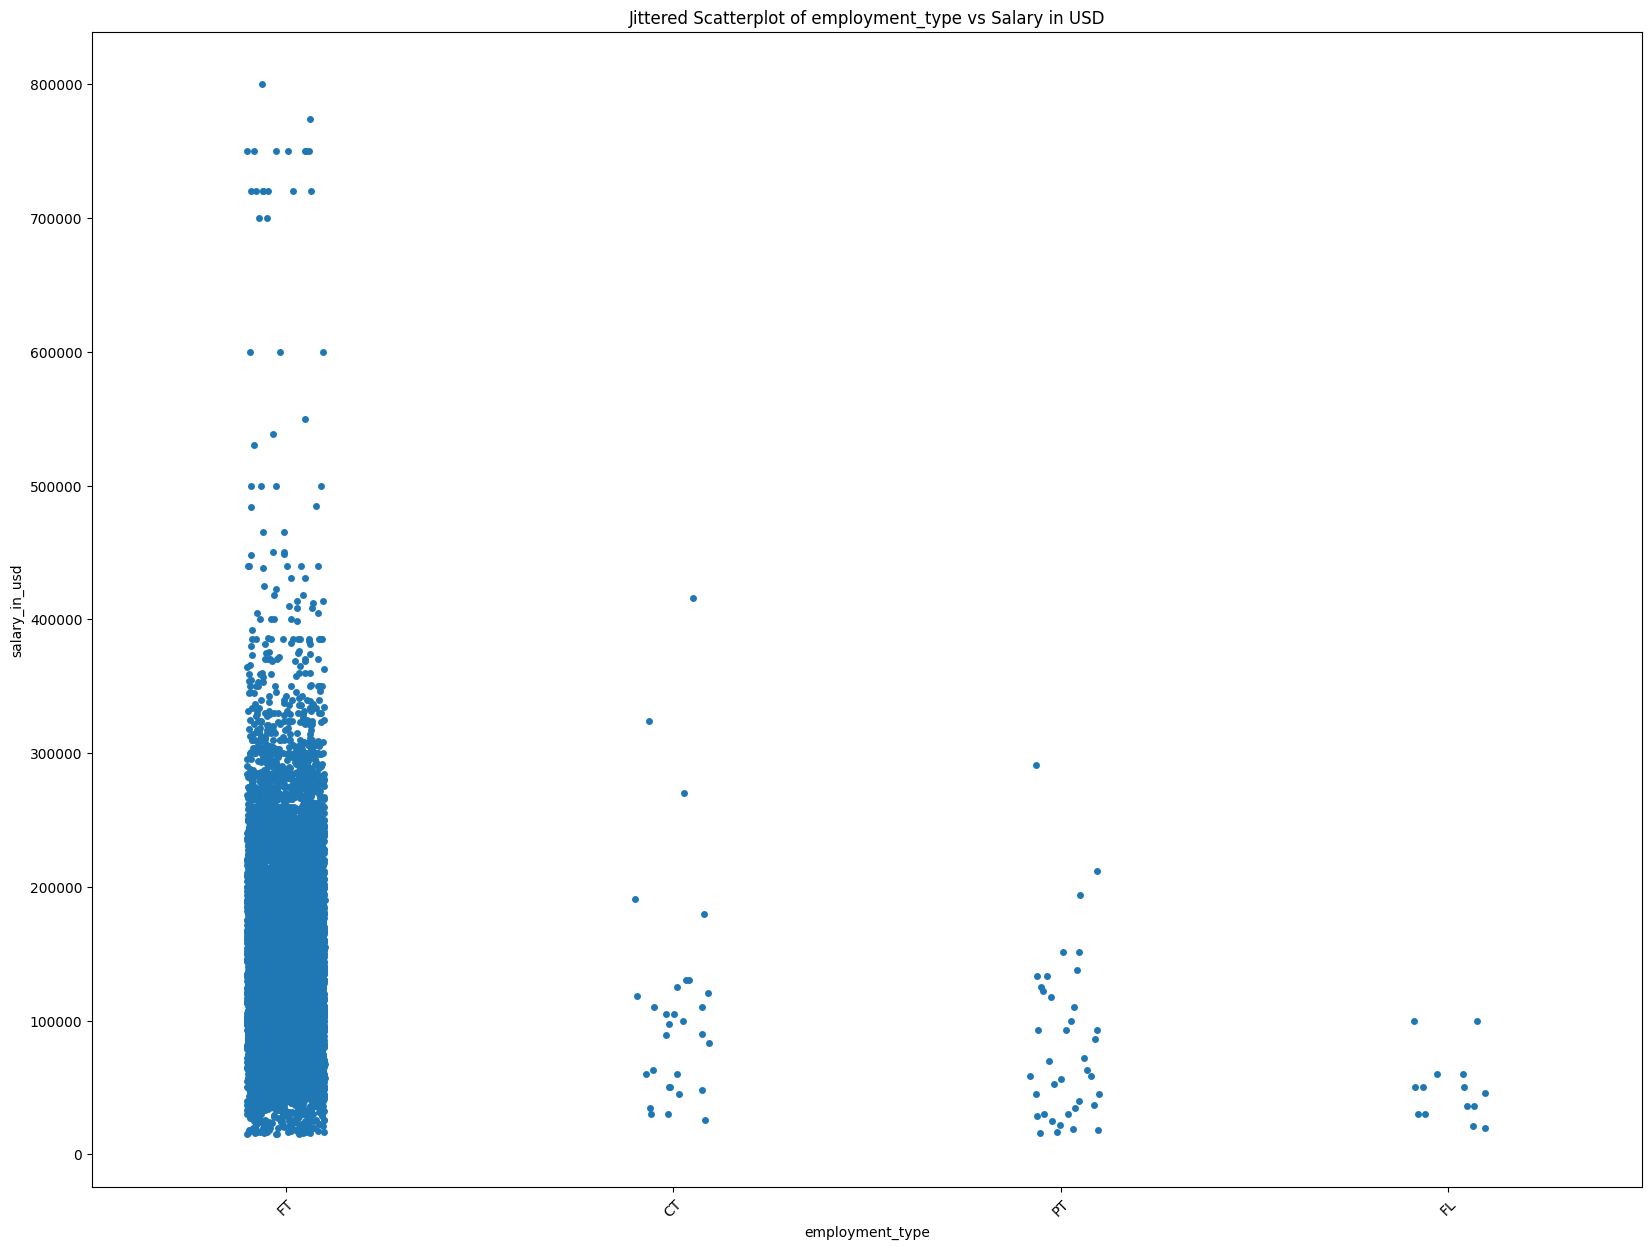

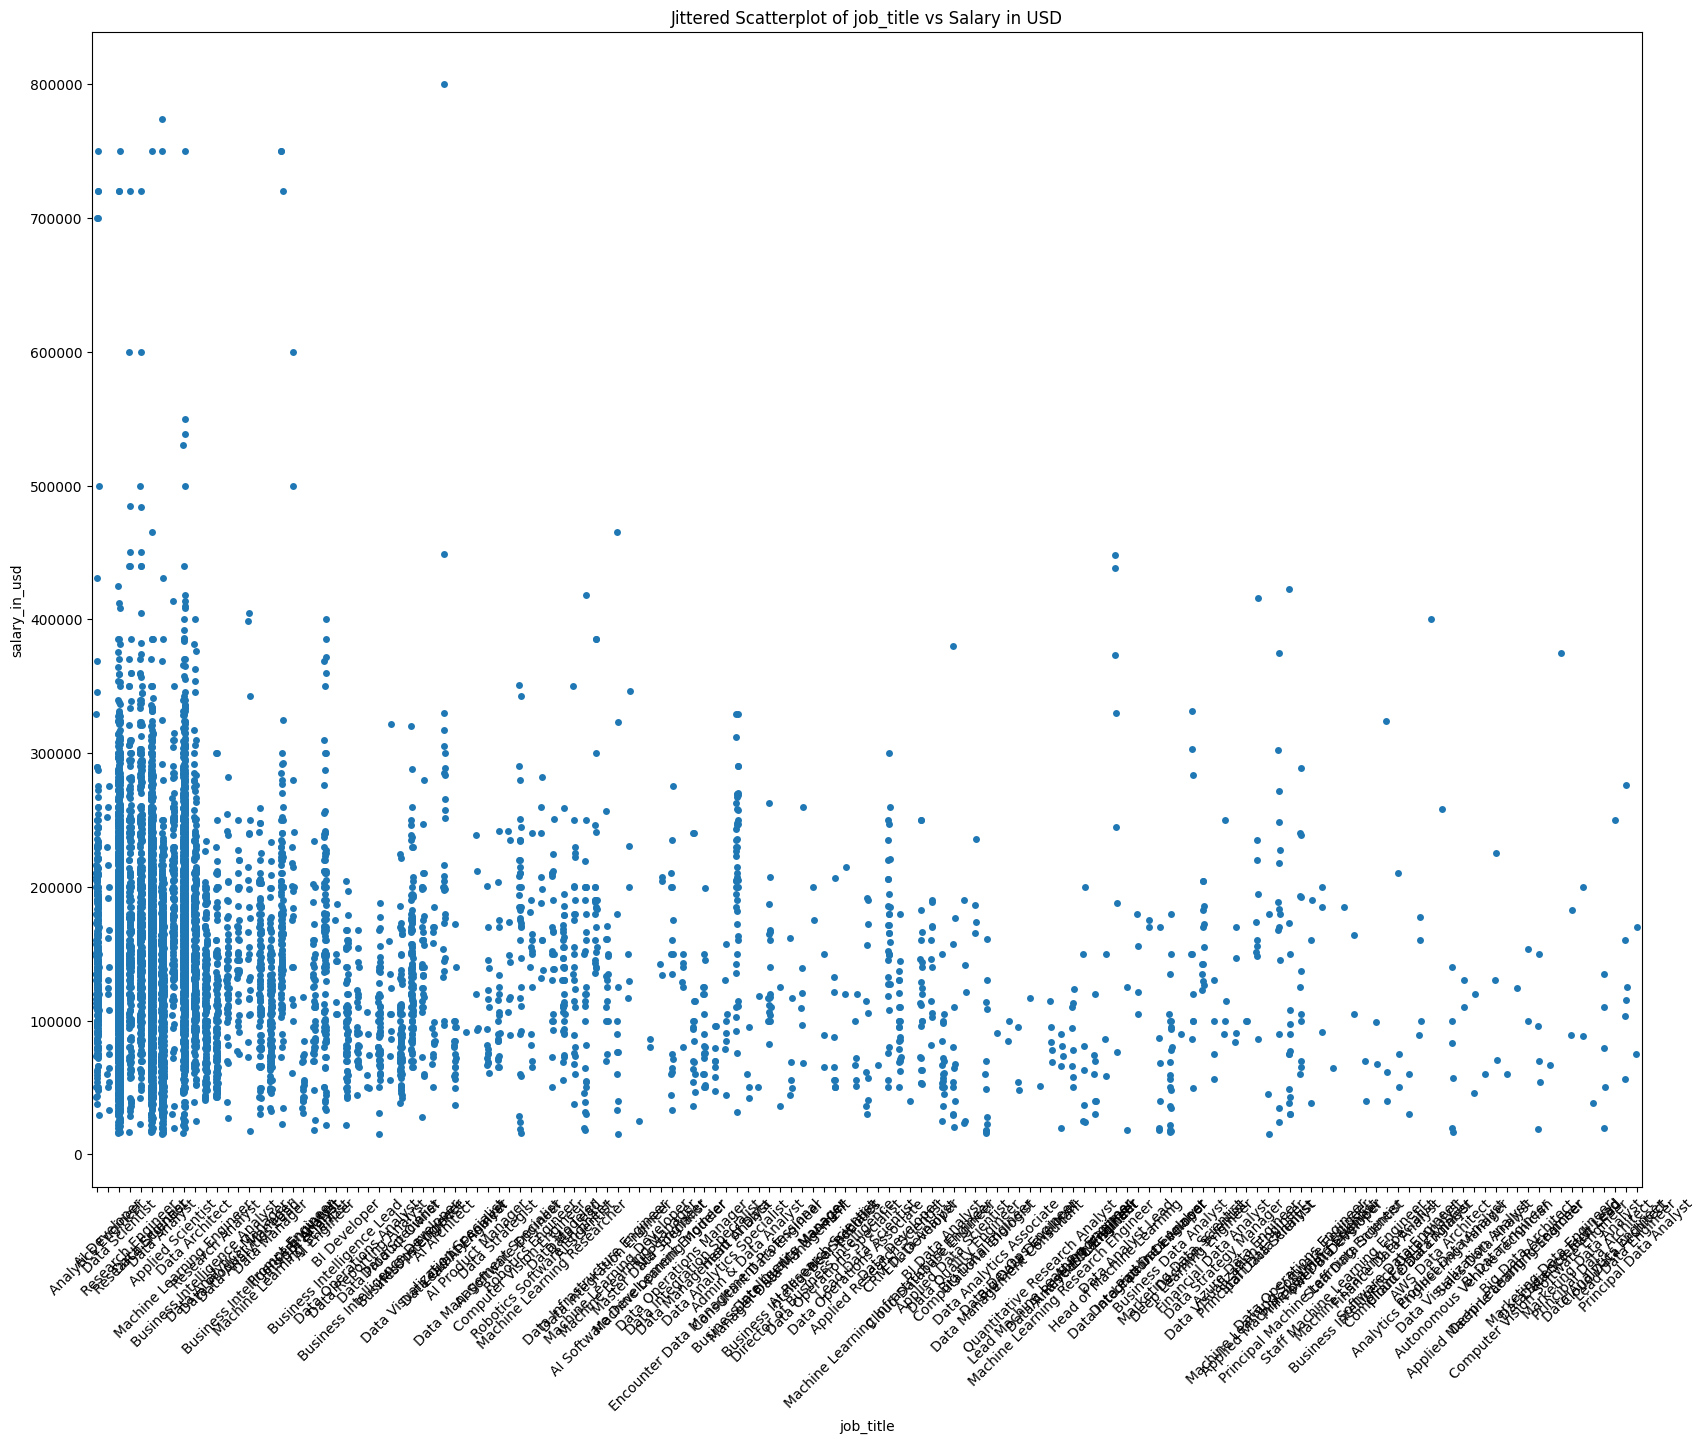

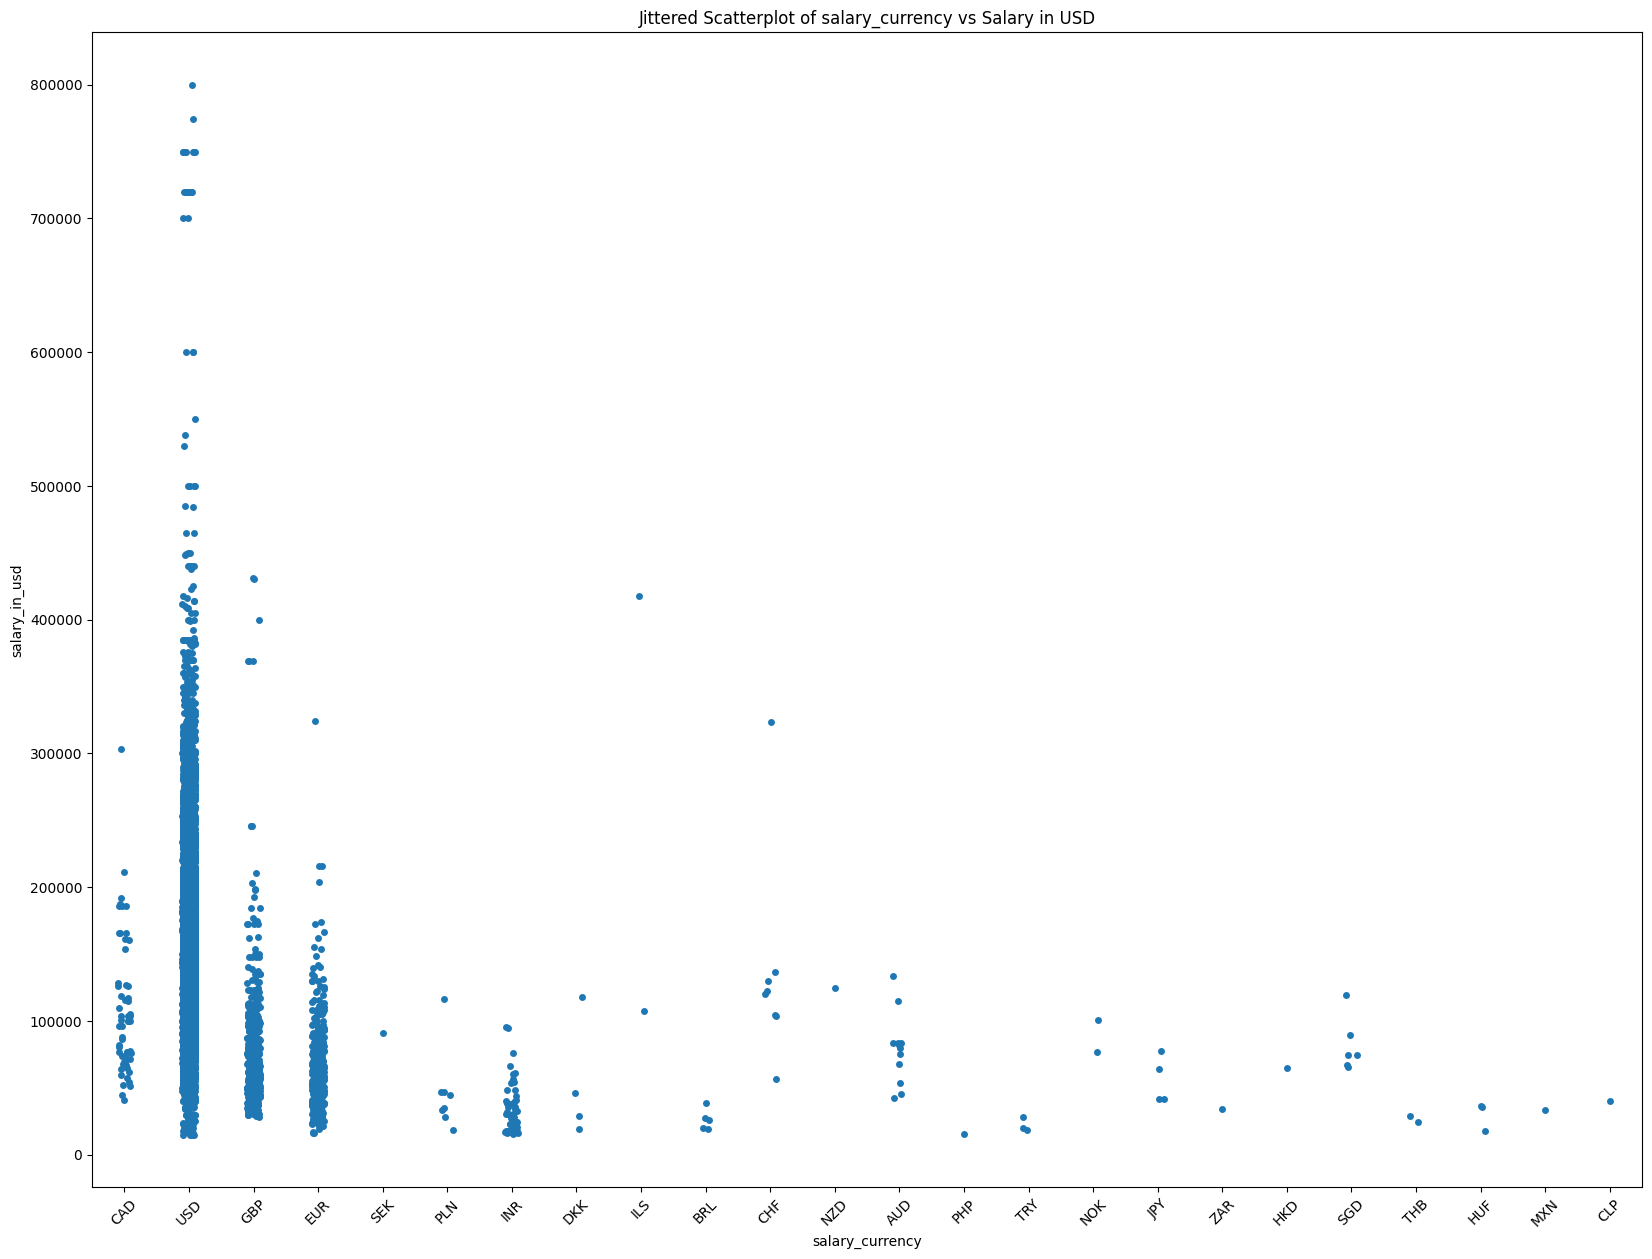

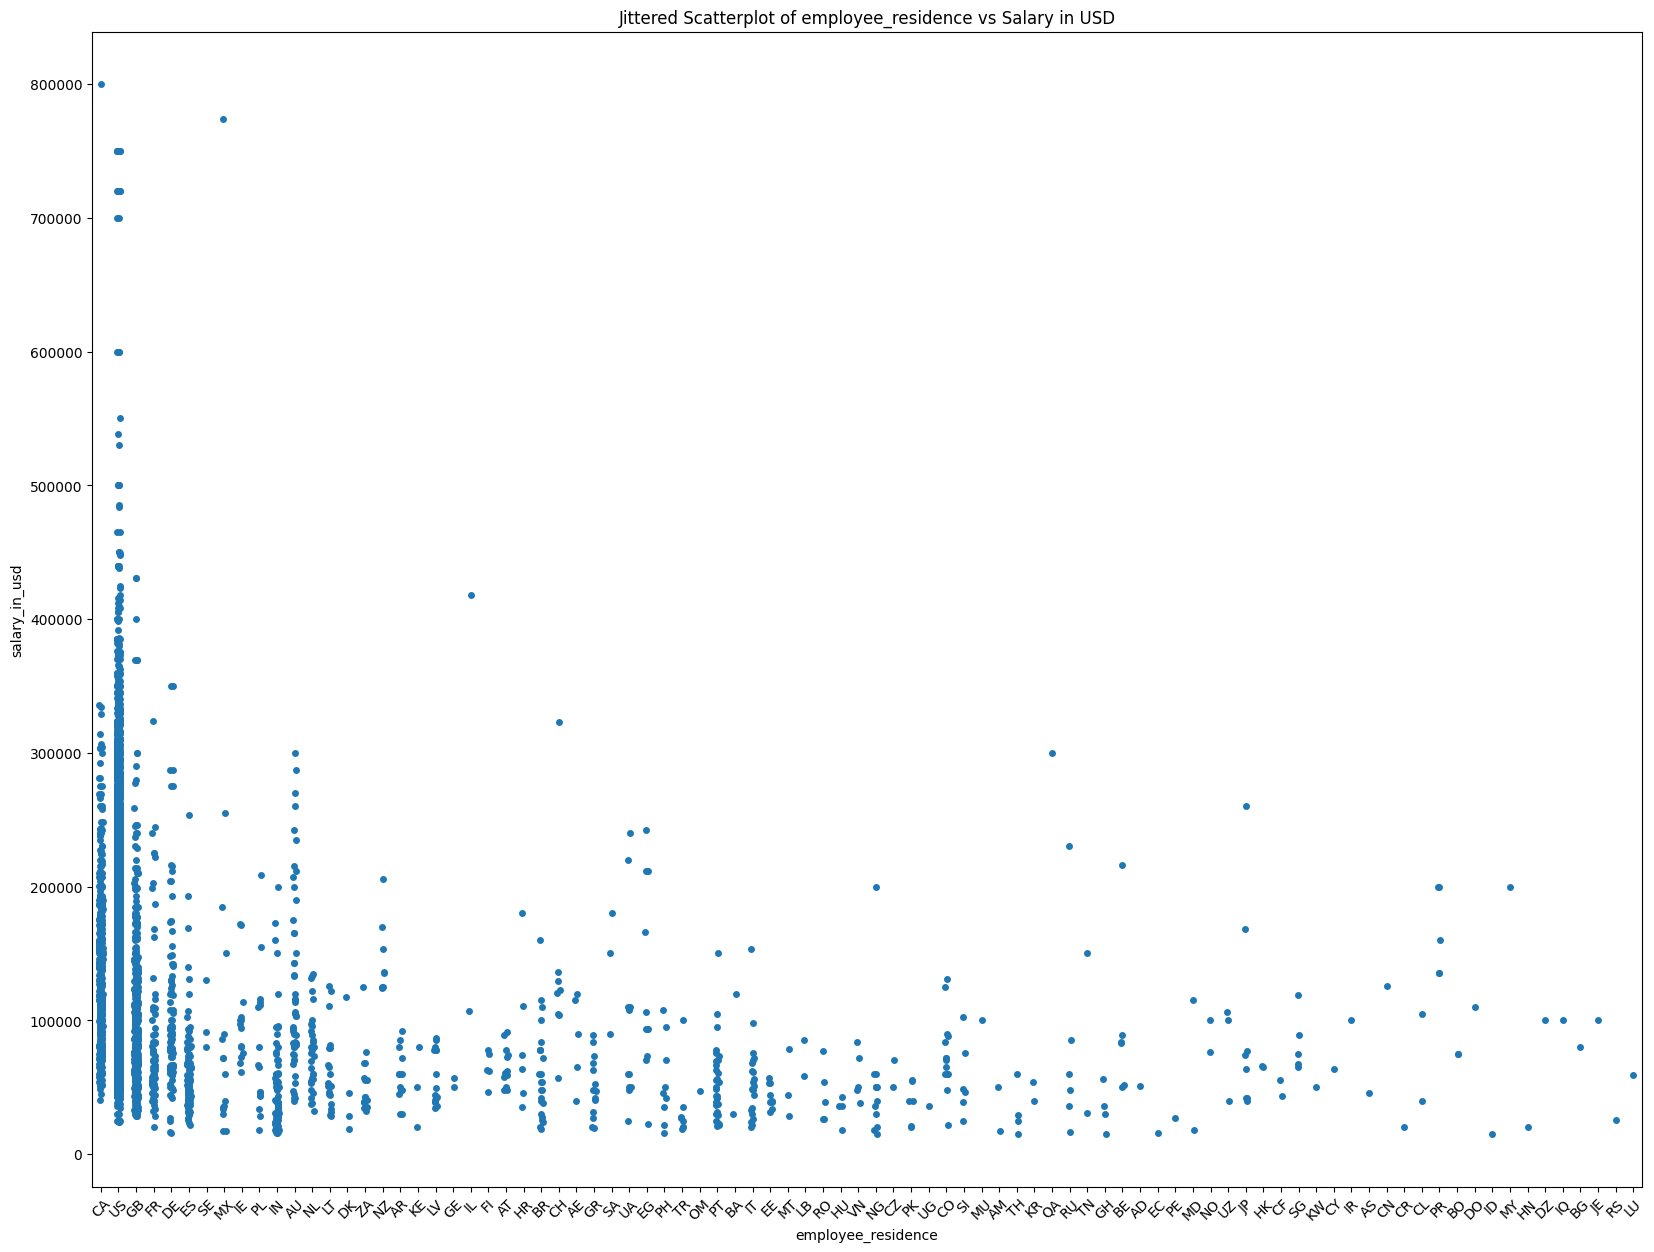

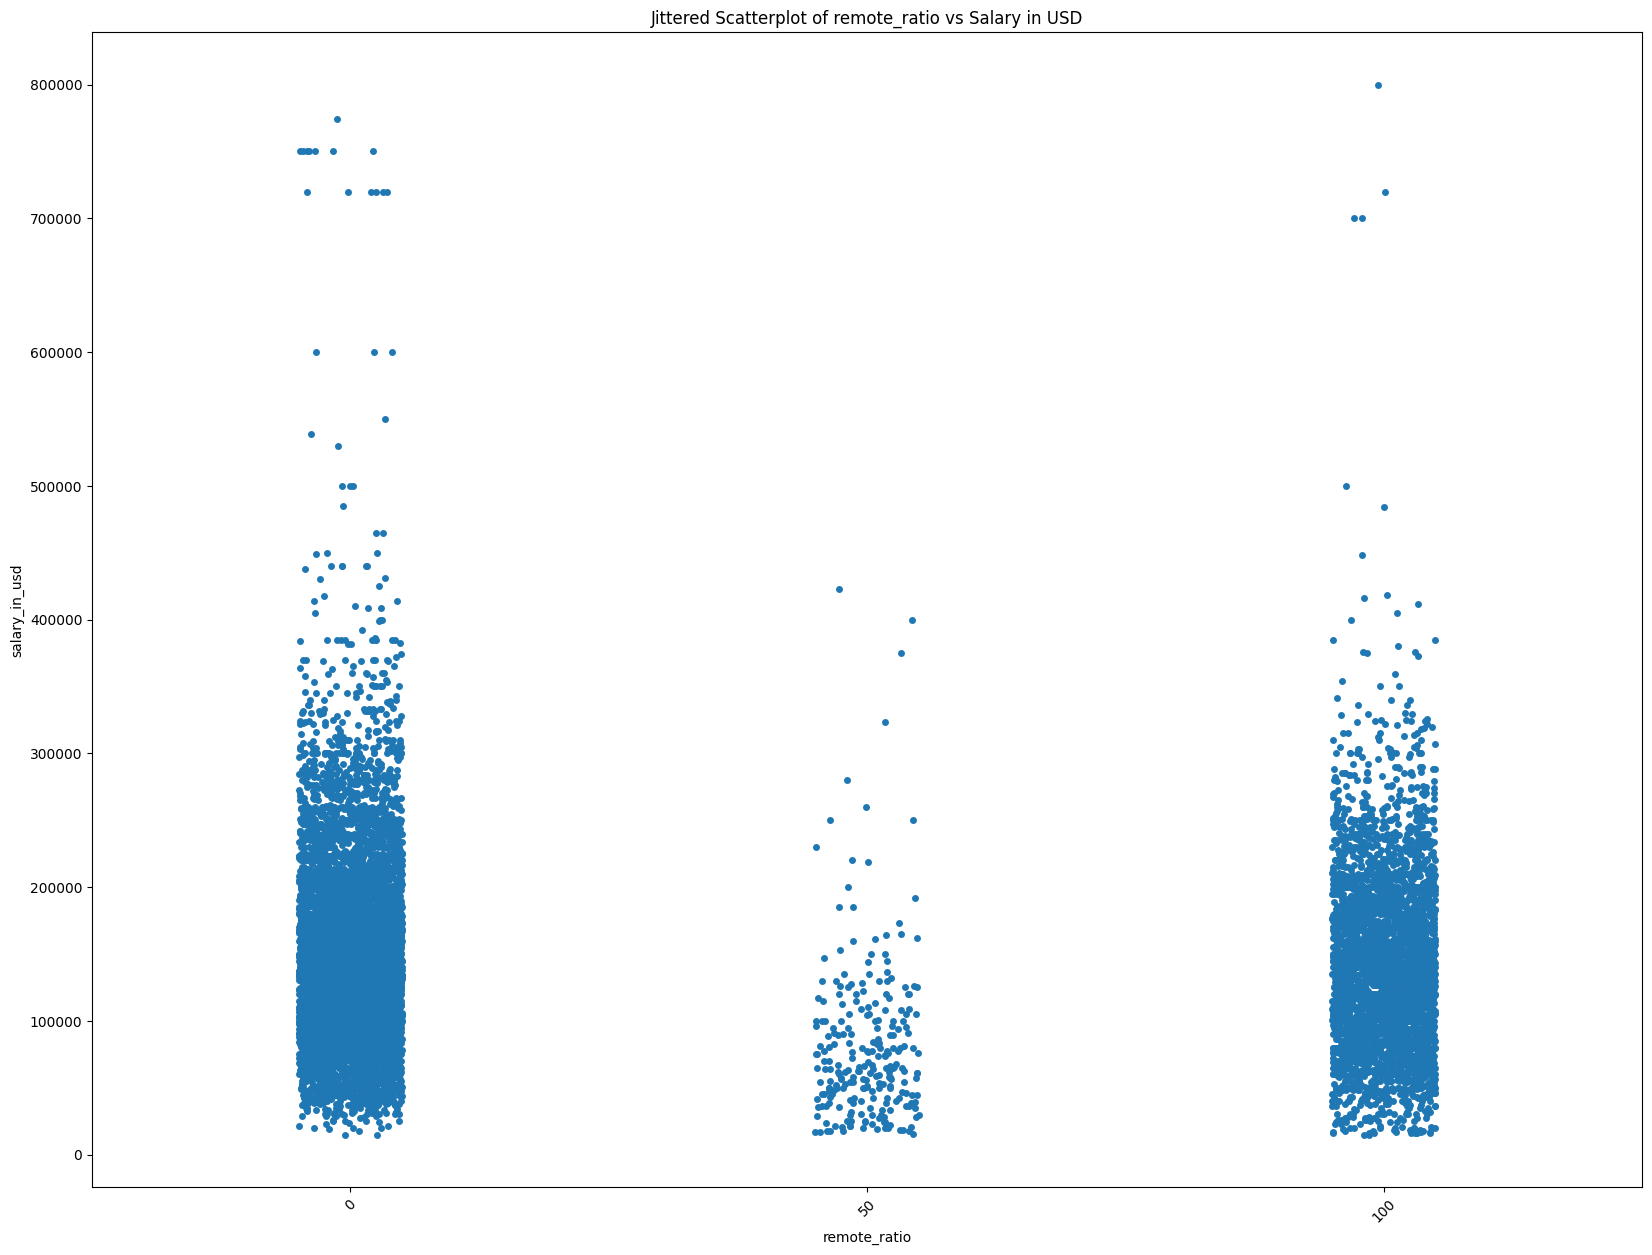

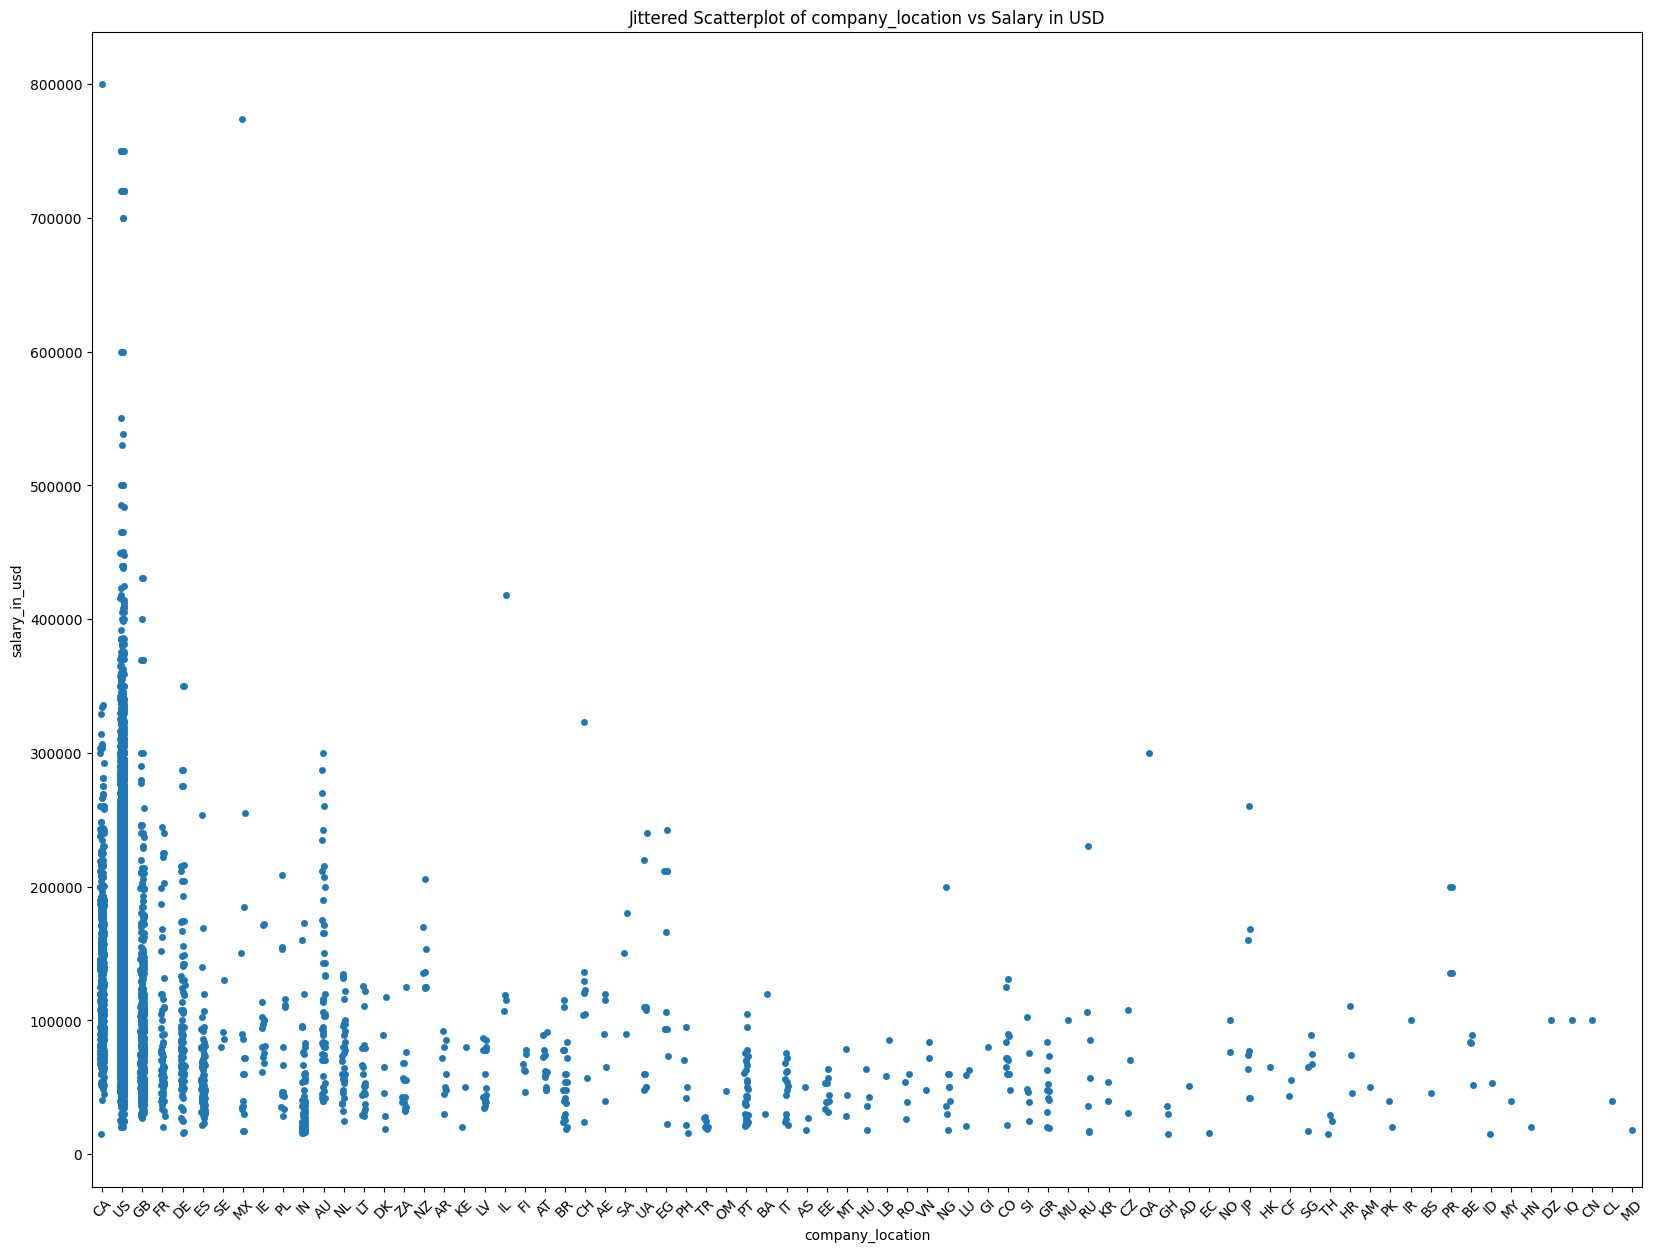

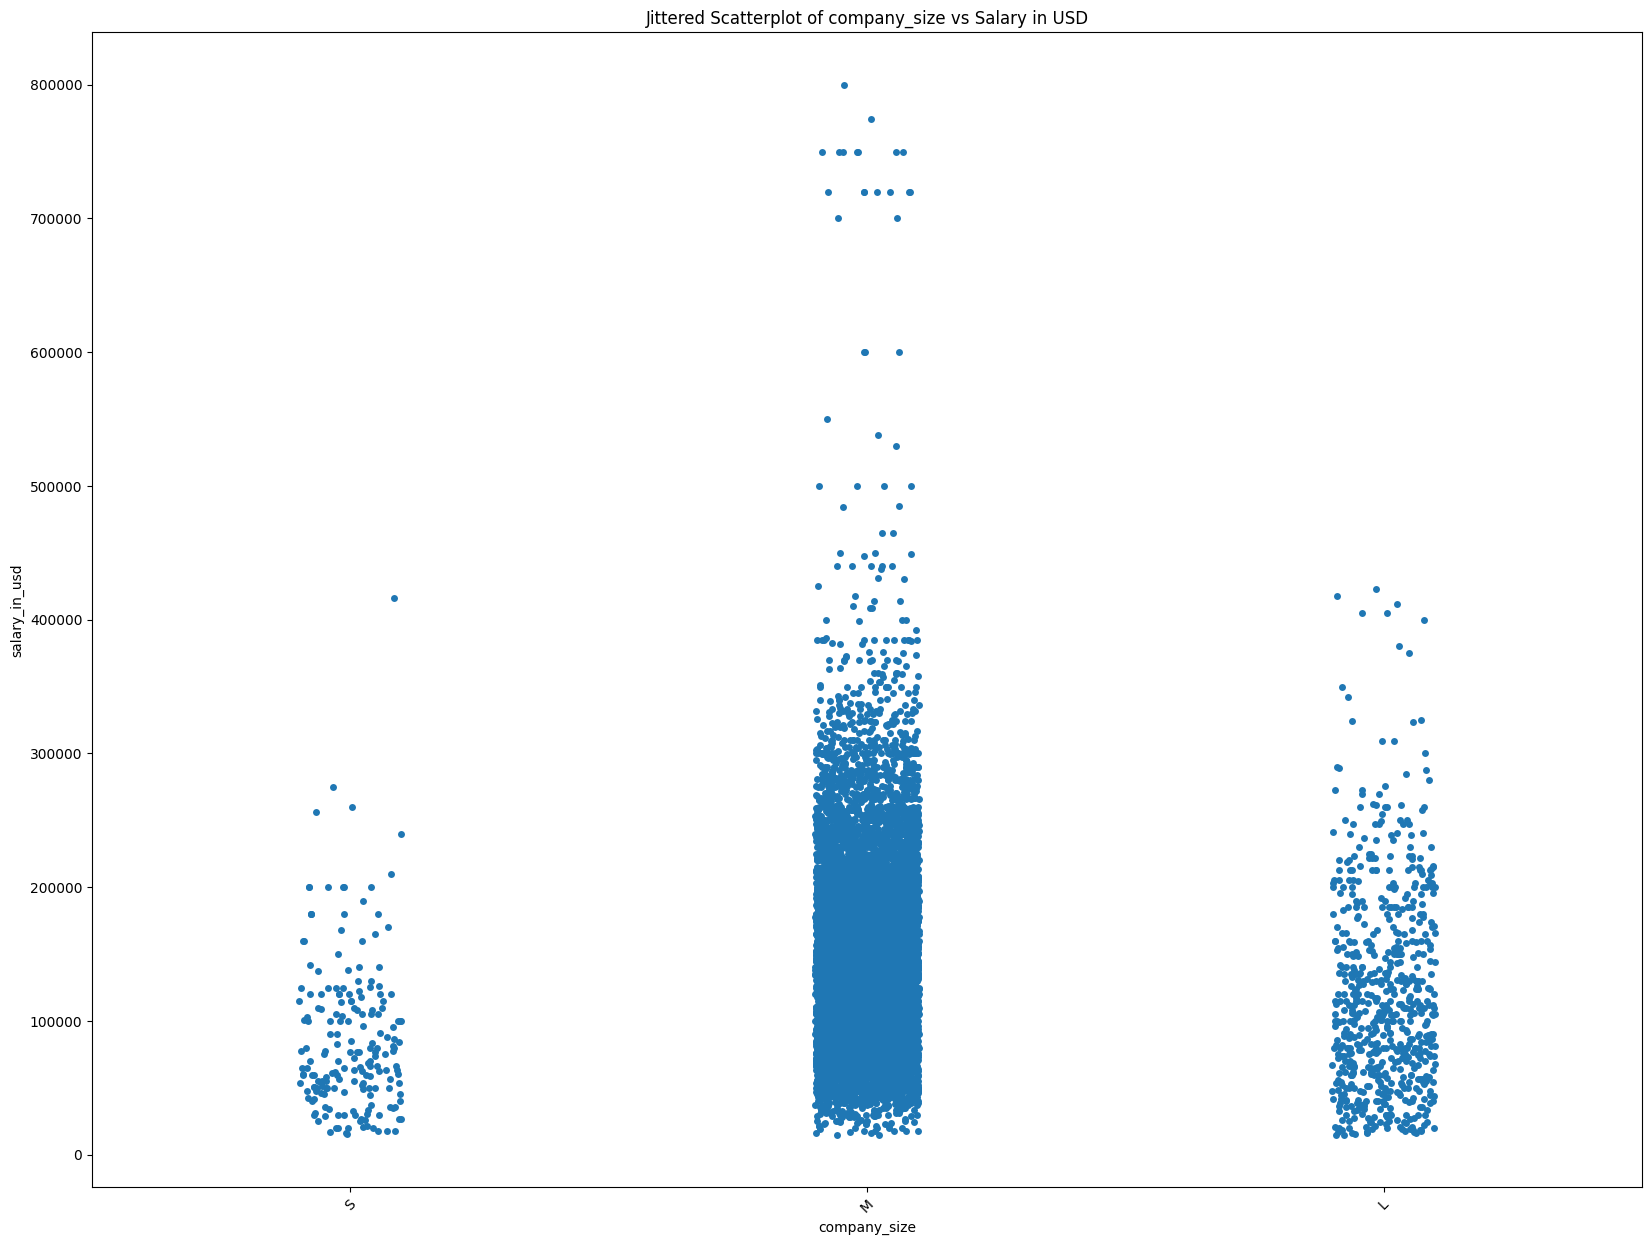

In [ ]:
categorical_columns = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency',
                       'employee_residence', 'remote_ratio', 'company_location', 'company_size']

# Create jittered scatterplots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(20, 15))
    sns.stripplot(x=col, y='salary_in_usd', data=df, jitter=True)
    plt.title(f'Jittered Scatterplot of {col} vs Salary in USD')
    plt.xticks(rotation=45)
    plt.show()

## Data Visualization



*   The graph shows how salary is changing from year 2020 to 2024.



<Axes: xlabel='work_year'>

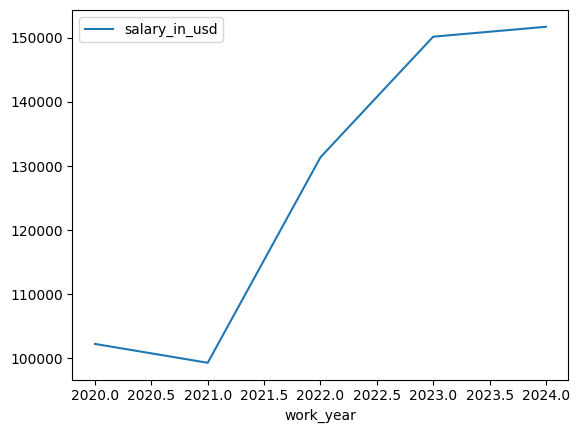

In [ ]:
salaries = pd.pivot_table(df, values = "salary_in_usd", index = "work_year")
salaries.plot()



*   The barplot shows what is remote ratio in different companies.



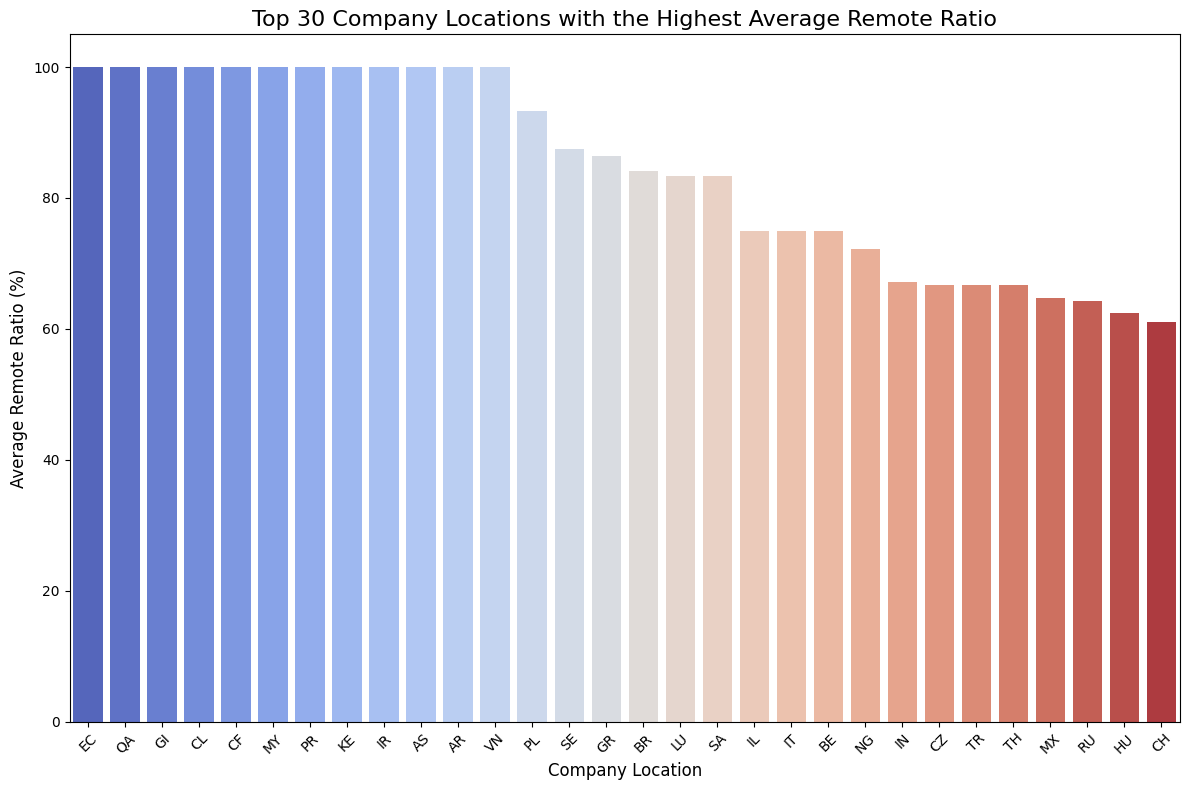

In [ ]:
avg_remote_ratio_by_location = df.groupby('company_location')['remote_ratio'].mean().reset_index()

# Step 2: Sort the locations by average remote_ratio and select the top 10
top_company_locations = avg_remote_ratio_by_location.sort_values('remote_ratio', ascending=False).head(30)

# Step 3: Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='company_location', y='remote_ratio', data=top_company_locations, palette='coolwarm')

# Step 4: Customize the plot
plt.title('Top 30 Company Locations with the Highest Average Remote Ratio', fontsize=16)
plt.xlabel('Company Location', fontsize=12)
plt.ylabel('Average Remote Ratio (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()



*   This graph shows the remote ratio from 2020 to 2024.




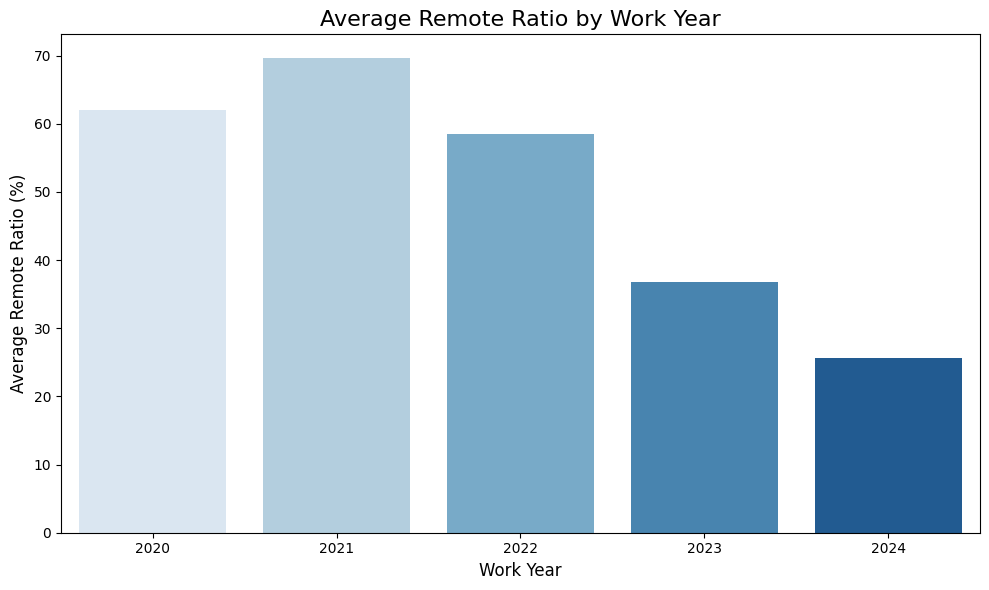

In [ ]:
avg_remote_ratio_by_year = df.groupby('work_year')['remote_ratio'].mean().reset_index()

# Step 2: Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='work_year', y='remote_ratio', data=avg_remote_ratio_by_year, palette='Blues')

# Step 3: Customize the plot
plt.title('Average Remote Ratio by Work Year', fontsize=16)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Average Remote Ratio (%)', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()



*   The graph shows remote ratio of employees from different countries.



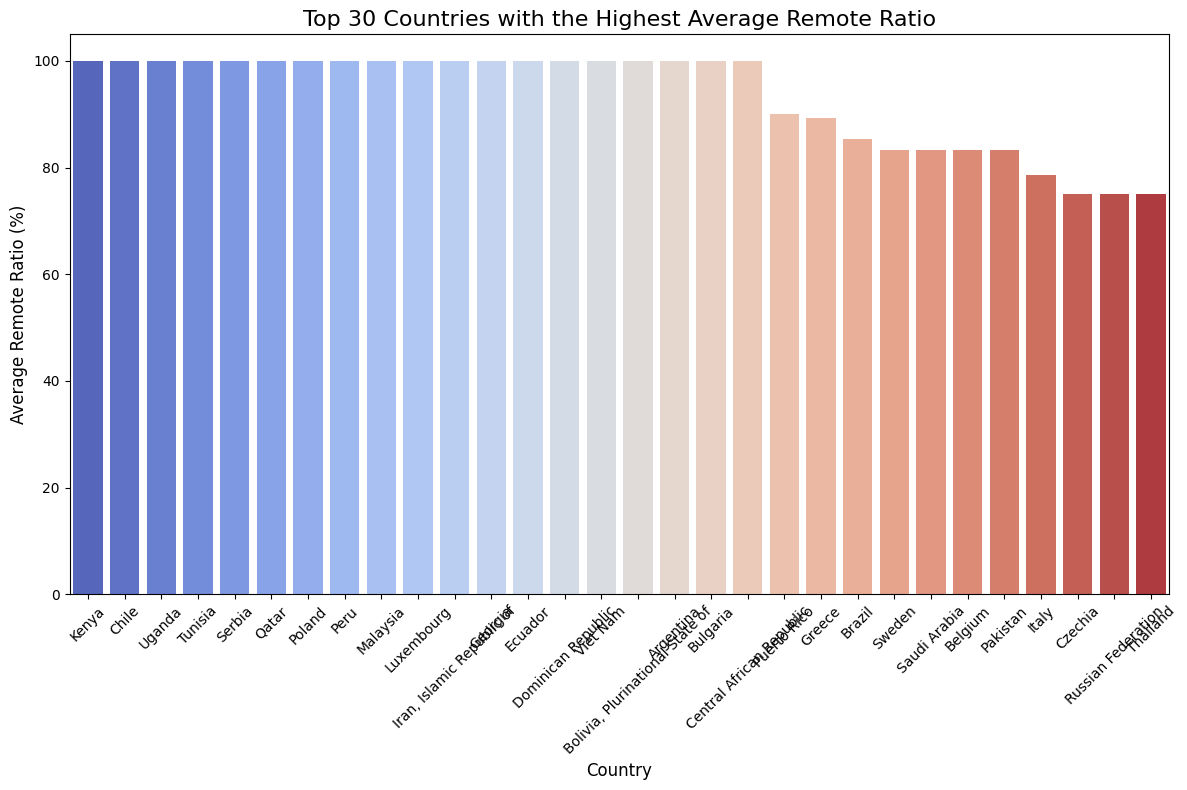

In [ ]:
import pycountry

# Function to map ISO 3166 country codes to country names
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

# Create 'country' column from 'employee_residence'
df['country'] = df['employee_residence'].apply(get_country_name)

# Step 1: Calculate the average remote_ratio for each country
avg_remote_ratio_by_country = df.groupby('country')['remote_ratio'].mean().reset_index()

# Step 2: Sort the countries by average remote_ratio and select the top 10
top_countries = avg_remote_ratio_by_country.sort_values('remote_ratio', ascending=False).head(30)

# Step 3: Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='remote_ratio', data=top_countries, palette='coolwarm')

# Step 4: Customize the plot
plt.title('Top 30 Countries with the Highest Average Remote Ratio', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Remote Ratio (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()



*   The graph shows salary given to employees from different countries.



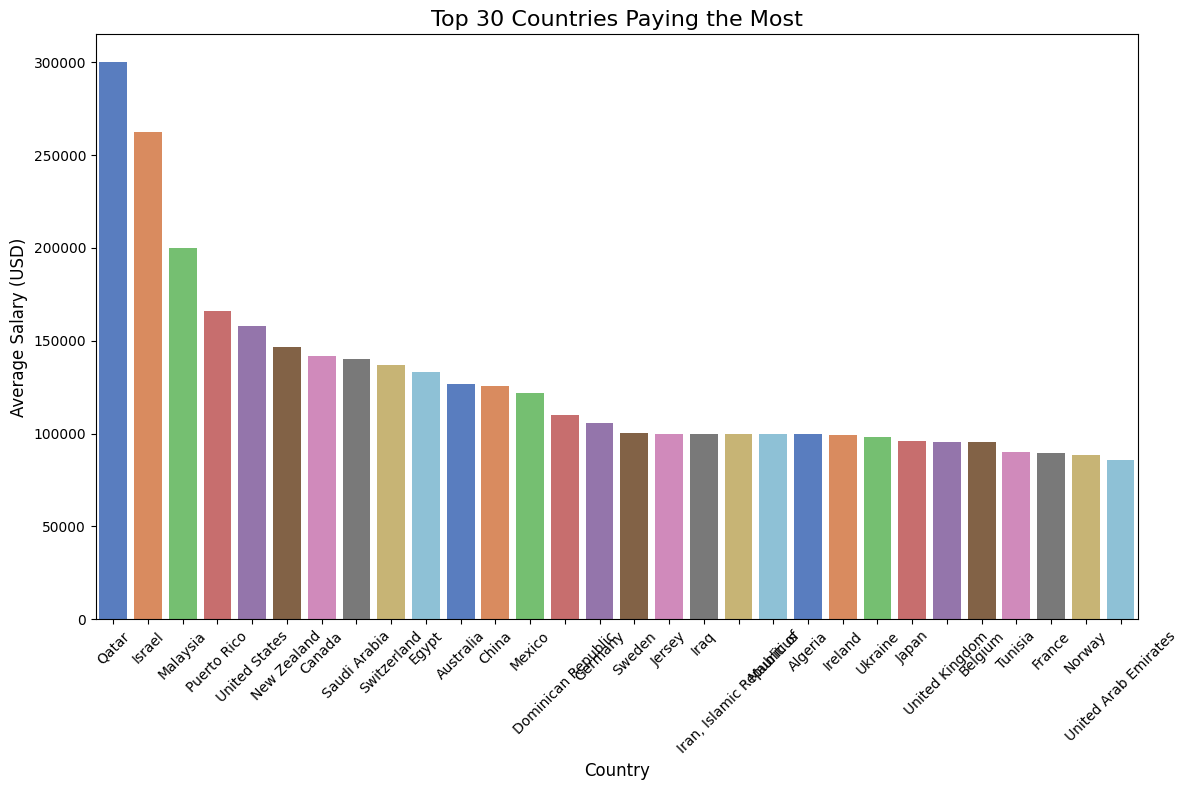

In [ ]:
import pycountry

# Function to map ISO 3166 codes to country names
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

# Create 'country' column from 'employee_residence'
df['country'] = df['employee_residence'].apply(get_country_name)

# Step 1: Calculate the average salary for each country
avg_salary_by_country = df.groupby('country')['salary_in_usd'].mean().reset_index()

# Step 2: Sort the countries by average salary and select the top 10
top_countries = avg_salary_by_country.sort_values('salary_in_usd', ascending=False).head(30)

# Step 3: Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='salary_in_usd', data=top_countries, palette='muted')

# Step 4: Customize the plot
plt.title('Top 30 Countries Paying the Most', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()



*   The graph shows salaries of different job titles.



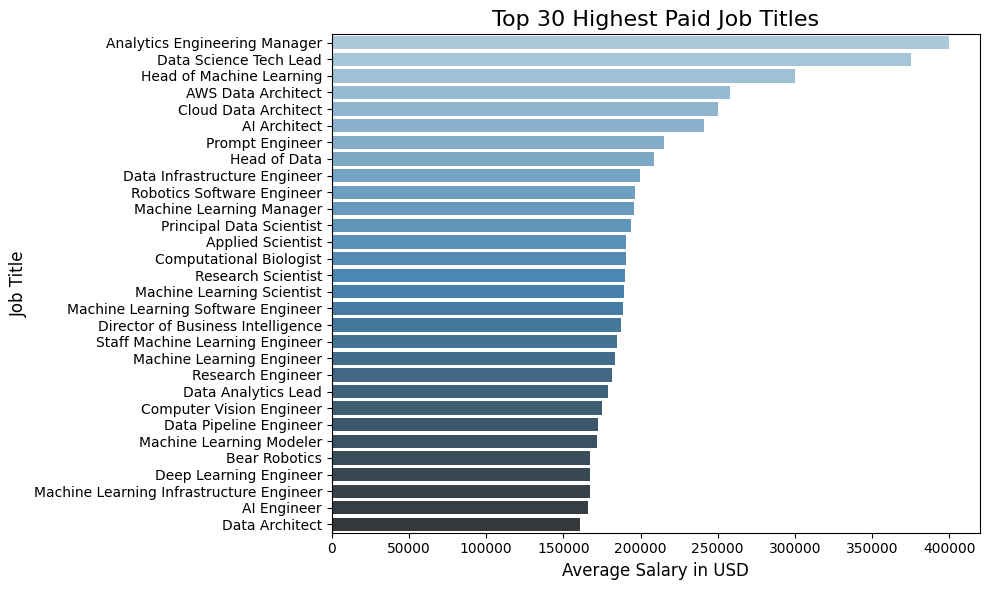

In [ ]:
avg_salary = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Step 2: Sort by salary in descending order and select the top 5 job titles
top_30_jobs = avg_salary.sort_values(by='salary_in_usd', ascending=False).head(30)

# Step 3: Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='salary_in_usd', y='job_title', data=top_30_jobs, palette='Blues_d')

# Step 4: Customize the plot
plt.title('Top 30 Highest Paid Job Titles', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()



*   The graph shows variance in salaries with experience level.







<Axes: xlabel='experience_level'>

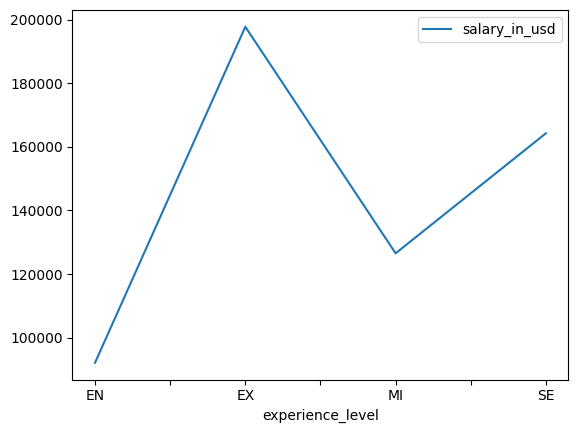

In [ ]:
salaries = pd.pivot_table(df, values = "salary_in_usd", index = "experience_level")
salaries.plot()



*   The graph shows variance in salaries with employment type.



<Axes: xlabel='employment_type'>

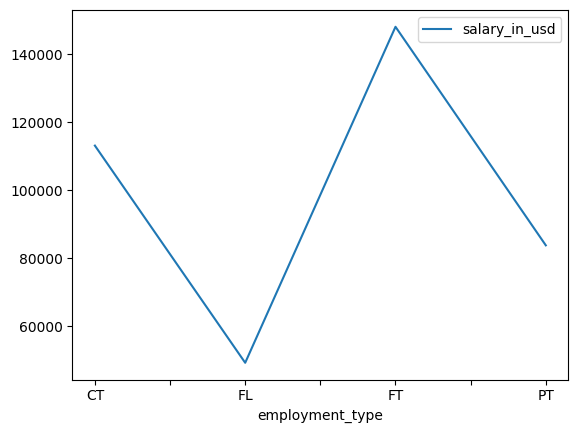

In [ ]:
salaries = pd.pivot_table(df, values = "salary_in_usd", index = "employment_type")
salaries.plot()



*   The grap show variance in salaries with size of company.



<Axes: xlabel='company_size'>

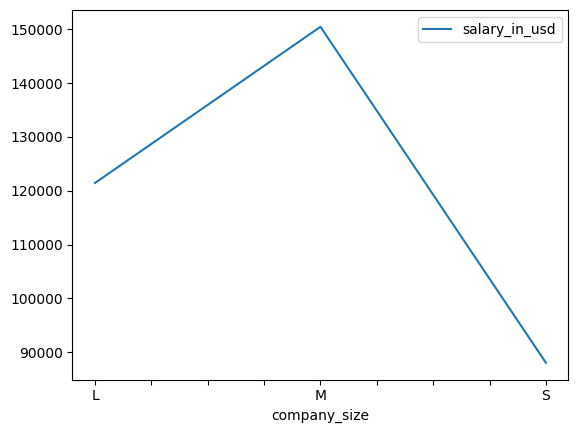

In [ ]:
salaries = pd.pivot_table(df, values = "salary_in_usd", index = "company_size")
salaries.plot()

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10676 entries, 0 to 18055
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           10676 non-null  int64 
 1   experience_level    10676 non-null  object
 2   employment_type     10676 non-null  object
 3   job_title           10676 non-null  object
 4   salary              10676 non-null  int64 
 5   salary_currency     10676 non-null  object
 6   salary_in_usd       10676 non-null  int64 
 7   employee_residence  10676 non-null  object
 8   remote_ratio        10676 non-null  int64 
 9   company_location    10676 non-null  object
 10  company_size        10676 non-null  object
 11  country             10676 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


## Findings and Explorations



*   Highest salaries are paid in 2024 while lowest were paid in 2021.

*   Companies in Ecuador are hiring the most remote workers.

*   The higest number of remote workers are from Kenya.

*   Qatar is paying the highest salaries being paid.


*   Analytics Engineering Manager is highest paid job.


*   Executive level jobs are paid the highest.


*   Medium size companies are paying the most.



## Applying ML Model for Salary Prediction.

In [ ]:
categorical_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size', 'country']


In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
df_2 = df.copy()



*   This model is not standardized or normalized.



In [ ]:
X = df_2.drop(columns=['salary_in_usd'])
y = df_2['salary_in_usd']

# Define Label Encoding for specific columns
def label_encode_columns(df_2, columns):
    for col in columns:
        df_2[col] = LabelEncoder().fit_transform(df_2[col])
    return df_2

# Apply label encoding to 'experience_level' and 'company_size' using FunctionTransformer
label_columns = ['experience_level', 'company_size']
def label_encode_func(df_2):
    return label_encode_columns(df_2, label_columns)
label_transformer = FunctionTransformer(label_encode_func, validate=False)

#label_transformer = FunctionTransformer(lambda df_2: label_encode_columns(df_2, label_columns), validate=False)

# Define categorical columns for one-hot encoding
onehot_columns = ['employment_type', 'salary_currency', 'employee_residence', 'company_location', 'job_title', 'country']

# Preprocessor: Label encode 'experience_level' and 'company_size', one-hot encode other categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('label', label_transformer, label_columns),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_columns)
    ], remainder='passthrough')  # Keep numerical columns as is

# Pipelines for both models
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)

# Train Linear Regression
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)

# Evaluation function to calculate R2, MAE, and RMSE
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"Model: {name}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print('-' * 40)

# Print evaluation reports for both models
evaluate_model("Random Forest Regressor", y_test, rf_preds)
evaluate_model("Linear Regression", y_test, lr_preds)

Model: Random Forest Regressor
R2 Score: 0.9671
Mean Absolute Error (MAE): 1190.1960
Root Mean Squared Error (RMSE): 14070.1127
----------------------------------------
Model: Linear Regression
R2 Score: 0.0222
Mean Absolute Error (MAE): 55312.7144
Root Mean Squared Error (RMSE): 76717.5722
----------------------------------------


## Recommendations:
Anybody looking for tech related jobs should apply to job hirings from countries which are paying the most.

The candidate should upskill himself/herself with the tech skills that are being paid the most salaries.

## Model Saving and Loading

In [ ]:
import joblib
joblib.dump(rf_pipeline, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/MLops Models/random_forest_model.pkl')